# <center> Epsilon AI Final Project ( Brazilian E-commerce store )

## Table of Contents
1.0 Introduction

2.0 Data loading

3.0 Data Cleaning

        3.1 Merging ALL Dataframes

        3.2 Handling Missing Values

        3.3 Drop Duplicates

        3.4 Feature Engineering

4.0 Exploratory Data Analysis (EDA)

        6.1 Univariate Analysis

        6.2 Multivariate Analysis
    
5.0 - Data preprocesing

        6.1 Data encoding

        6.2 Feature scaling

        6.3 Handle imbalance
        
6.0 - Modeling

        6.1 Apply ML models

        6.2 Hyperparameter Tuning
        
7.0 - Pipeline

8.0 - NLP For Customer Satisfaction

9.0 - Customer Segmentation

        9.1 Customer Segmentation by RFM Analysis

        9.2 Customer Segmentation by K-Means

10.0 - Model Deployment (EDA & Classification & Clustering)

11.0 -  Wrap up & Conclusion

# 1.0 Introduction
##### This project is about "Olist", a Brazilian ecommerce store which has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil where its features allow viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

# 2.0 Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from imblearn.pipeline import Pipeline

### Read All Files

In [3]:
customers_df= pd.read_csv('olist_customers_dataset.csv')
geolocation_df= pd.read_csv('olist_geolocation_dataset.csv')
items_df= pd.read_csv('olist_order_items_dataset.csv')
payments_df= pd.read_csv('olist_order_payments_dataset.csv')
reviews_df= pd.read_csv('olist_order_reviews_dataset.csv')
orders_df= pd.read_csv('olist_orders_dataset.csv')
products_df= pd.read_csv('olist_products_dataset.csv')
sellers_df= pd.read_csv('olist_sellers_dataset.csv')
category_translation_df= pd.read_csv('product_category_name_translation.csv')

### "Customers" Dataset

In [4]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### "Geolocation" Dataset

In [5]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### "Order items" Dataset

In [6]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### "Order Payments" Dataset

In [7]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### "Order Reviews" Dataset

In [8]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### "Orders" Dataset

In [9]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### "Products" Dataset

In [10]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### "Sellers" Dataset

In [11]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### "Product Category Name Translation" Dataset

In [12]:
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# 3.0 Data Cleaning

### 3.1 Merging All Dataframes

In [13]:
df= pd.merge(customers_df, orders_df, on="customer_id", how='inner')
df= df.merge(reviews_df, on="order_id", how='inner')
df= df.merge(items_df, on="order_id", how='inner')
df= df.merge(products_df, on="product_id", how='inner')
df= df.merge(payments_df, on="order_id", how='inner')
df= df.merge(sellers_df, on='seller_id', how='inner')
df= df.merge(category_translation_df, on='product_category_name', how='inner')
df.shape

(115609, 40)

### Show All Features

In [14]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')

#### Check duplicates

In [15]:
df.duplicated().sum()

0

In [16]:
df.describe()

,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,4.034409,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,1.093747,2.946233,172.387379,24515.713958
std,29841.671732,1.385584,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,0.729849,2.781087,265.873969,27636.640968
min,1003.000000,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000
25%,11310.000000,4.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000,6429.000000
50%,24241.000000,5.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.050000,13660.000000
75%,58745.000000,5.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.480000,28605.000000
max,99980.000000,5.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  review_id                     

### 3.2 Handling Missing Values

In [18]:
# Number of Missing Values for the first half of features

df.isna().sum()[:20]

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
order_item_id                         0
product_id                            0
dtype: int64

##### Drop All Missing Values in datetime columns

In [19]:
df.dropna(subset= ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

##### Keep " review_comment_message " & " review_comment_title "  Features ( Will be handled later )

In [20]:
# Number of Missing Values for the Second half of features

df.isna().sum()[20:]

seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
product_category_name_english    0
dtype: int64

##### Check the missing values

In [21]:
df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']][df.product_weight_g.isna()]

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
27352,NaN,NaN,NaN,NaN


In [22]:
# Since all the missing values are in the same raw, we will drop this raw
df.drop(27352, inplace=True)

# Reset Index
df.reset_index(inplace= True, drop= True)

### 3.3 Feature Engineering

##### Classify Products Categories (71) into 9 main Categories

In [23]:
def classify_cat(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'
    
    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'
    
    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'
    
    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'
    
    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'
    
    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'
    
    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'
    
    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

df['product_category'] = df.product_category_name_english.apply(classify_cat)

In [24]:
df.product_category.value_counts()

Electronics                29568
Furniture                  28050
Entertainment              13507
Beauty & Health            13283
Home & Garden              12848
Fashion                     9722
Books & Stationery          3427
Industry & Construction     1633
Food & Drinks               1155
Name: product_category, dtype: int64

##### Combine Width, Height and Length to get Product Volume

In [25]:
# Create Volume Column
df['product_vol_cm3'] = df.product_length_cm * df.product_width_cm * df.product_height_cm

# Drop Width, Height and Length
df.drop(['product_length_cm', 'product_width_cm', 'product_height_cm'], axis= 1, inplace= True)

#### Convert Datetime features from Object to Datetime

In [26]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['order_delivered_carrier_date'] =pd.to_datetime(df['order_delivered_carrier_date'])

##### Extract duration of estimated shipping from purchasing date untill estimated delivery date

In [27]:
df['estimated_days'] = (df['order_estimated_delivery_date'].dt.date - df['order_purchase_timestamp'].dt.date).dt.days

##### Extract duration of shipping from purchasing date until delivered to customer date

In [28]:
df['arrival_days'] = (df['order_delivered_customer_date'].dt.date - df['order_purchase_timestamp'].dt.date).dt.days

##### Extract duration of shipping from purchasing carrier delivered date untill delivered to customer

In [29]:
df['shipping_days'] = (df['order_delivered_customer_date'].dt.date - df['order_delivered_carrier_date'].dt.date).dt.days

##### Drop inconsistent dates where "order_delivered_carrier_date" is greater than "order_delivered_customer_date"

In [30]:
df.drop((df[['order_delivered_carrier_date', 'order_delivered_customer_date']][df.shipping_days < 0]).index, inplace= True)

##### Shipping status from Seller to Carrier

In [31]:
# First get seller to carrier duration in days
df['seller_to_carrier_status'] = (df['shipping_limit_date'].dt.date - df['order_delivered_carrier_date'].dt.date).dt.days

# Now calssify the duration into 'OnTime/Early' & 'Late'
df['seller_to_carrier_status'] = df['seller_to_carrier_status'].apply(lambda x : 'OnTime/Early' if x >=0 else 'Late')

##### Shipping status from Carrier to Customer

In [32]:
# First get difference between estimated delivery date and actual delivery date in days
df['arrival_status'] = (df['order_estimated_delivery_date'].dt.date - df['order_delivered_customer_date'].dt.date).dt.days

# Now Classify the duration in 'OnTime/Early' & 'Late'
df['arrival_status'] = df['arrival_status'].apply(lambda x : 'OnTime/Early' if x >=0 else 'Late')

#### Show statistics of new Features

In [33]:
df[['estimated_days', 'arrival_days', 'shipping_days']].describe()

,estimated_days,arrival_days,shipping_days
count,113140.000000,113140.000000,113140.000000
mean,24.469427,12.383578,9.127594
std,8.825504,9.365912,8.567799
min,3.000000,0.000000,0.000000
25%,19.000000,7.000000,4.000000
50%,24.000000,10.000000,7.000000
75%,29.000000,15.000000,12.000000
max,156.000000,208.000000,205.000000


#### Remove Outliers in both features ( More than 60 days )

In [34]:
outlier_indices = df[(df.estimated_days > 60) | (df.arrival_days > 60) | (df.shipping_days > 60)].index

df.drop(outlier_indices, inplace= True)
df.reset_index(inplace= True, drop= True)

##### Rating estimated delivery time

In [35]:
def rates(x):

    if x in range(0, 8):
        return 'Very Fast'
    
    elif x in range(8, 16):
        return 'Fast'
    
    elif x in range(16, 25):
        return 'Neutral'
    
    elif x in range(25, 40):
        return 'Slow'
    
    else:
        return 'Very Slow'

df['estimated_delivery_rate'] = df.estimated_days.apply(rates)

df['arrival_delivery_rate'] = df.arrival_days.apply(rates)

df['shipping_delivery_rate'] = df.shipping_days.apply(rates)

# 4.0 Exploratory Data Analysis ( EDA ) 

### 4.1 Univariate Analysis

##### Top 10 Customers Capacity Cities

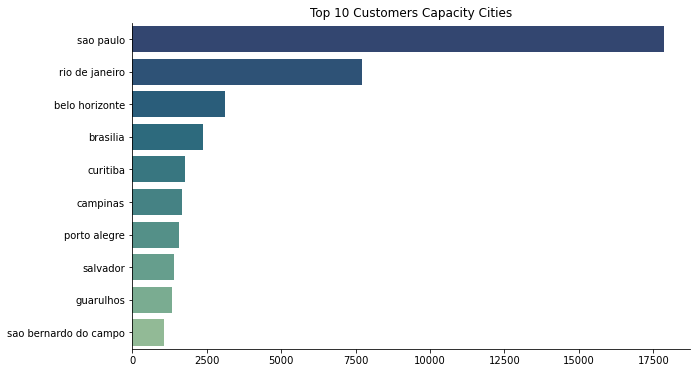

In [36]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.customer_city.value_counts().values[:10], y = df.customer_city.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Customers Capacity Cities')
sns.despine()

##### Top 10 Customers Capacity States

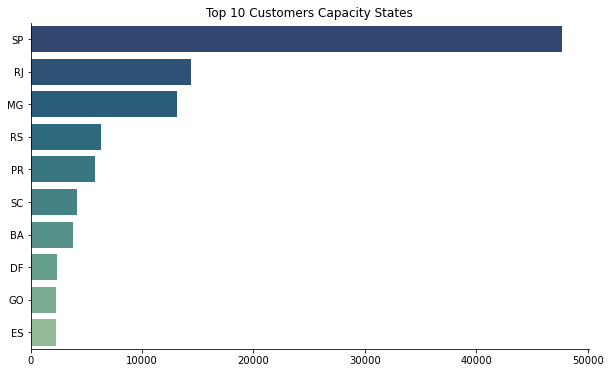

In [37]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.customer_state.value_counts().values[:10], y = df.customer_state.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Customers Capacity States')
sns.despine()

##### "Order_Status"

In [38]:
df.order_status.value_counts()

delivered    112526
canceled          7
Name: order_status, dtype: int64

#### Due to the Extreme imbalance and lack of variance in the feature, we should drop it

In [39]:
df.drop('order_status', axis=1, inplace=True)

##### " Review_Score "

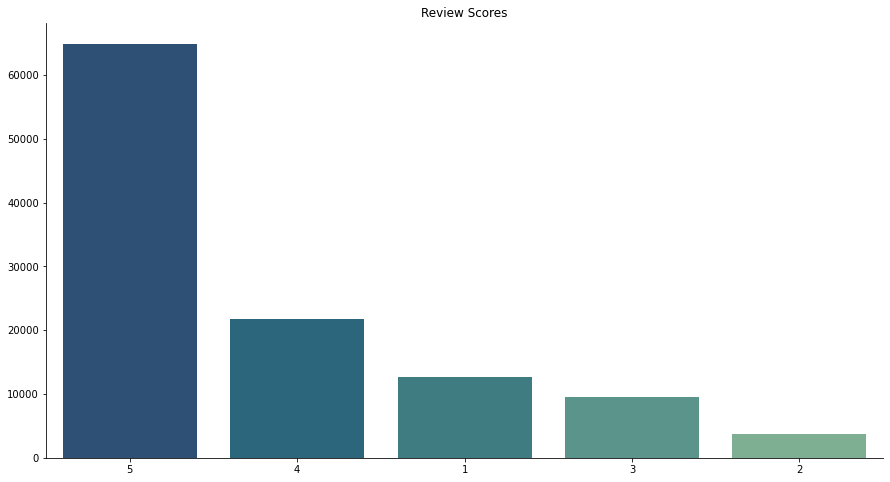

In [40]:
plt.figure(figsize=[15, 8])
review_score_index = [str(i) for i in df.review_score.value_counts().index]
sns.barplot(x = review_score_index, y= df.review_score.value_counts().values, palette= 'crest_r')
plt.title('Review Scores')
sns.despine()

##### " Price " 

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


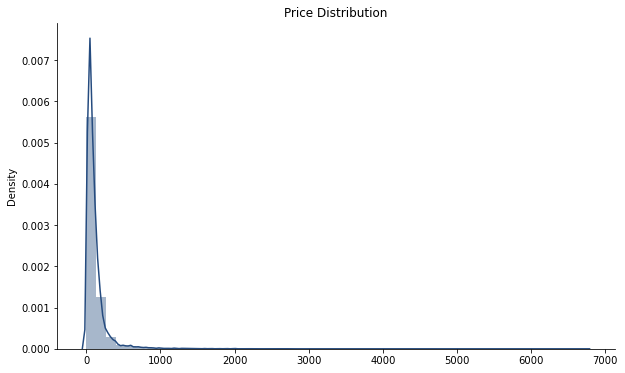

In [41]:
plt.figure(figsize=[10, 6])
sns.set_palette('crest_r')
sns.distplot(x = df.price)
plt.title('Price Distribution')
sns.despine()

##### " Freight Value " 

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


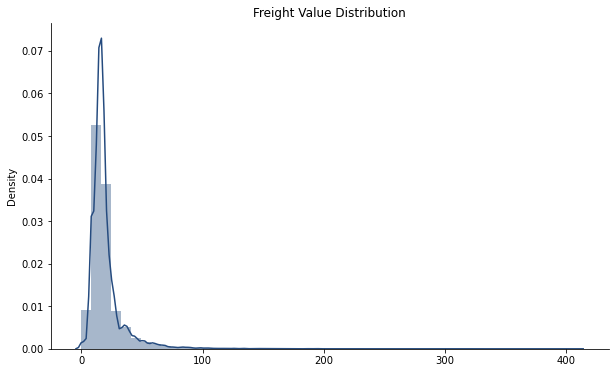

In [42]:
plt.figure(figsize=[10, 6])
sns.set_palette('crest_r')
sns.distplot(x = df.freight_value)
plt.title('Freight Value Distribution')
sns.despine()

##### " Number of orders per each Category " 

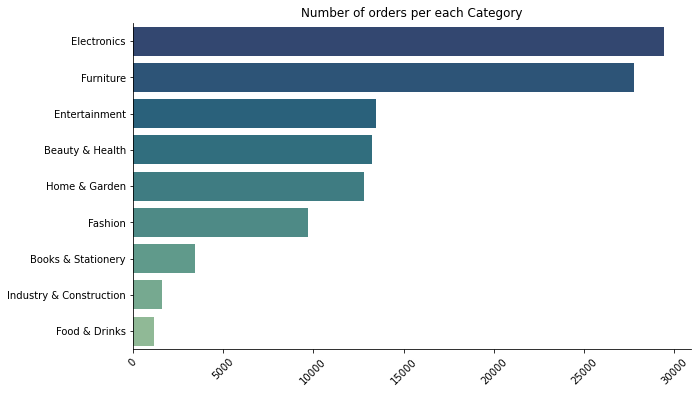

In [43]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.product_category.value_counts().values, y = df.product_category.value_counts().index, palette= 'crest_r')
plt.title('Number of orders per each Category')
plt.xticks(rotation = 45)
sns.despine()

##### " Product Name Length " 

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


array([29441, 27778, 13450, 13219, 12780,  9679,  3410,  1630,  1146],
      dtype=int64)

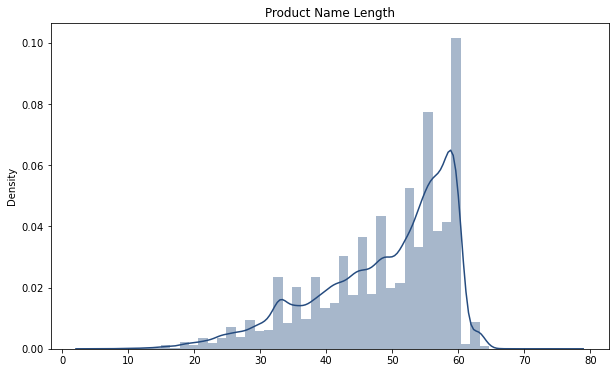

In [44]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df.product_name_lenght)
plt.title('Product Name Length')
df.product_category.value_counts().values

##### " Product Description Length " 

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


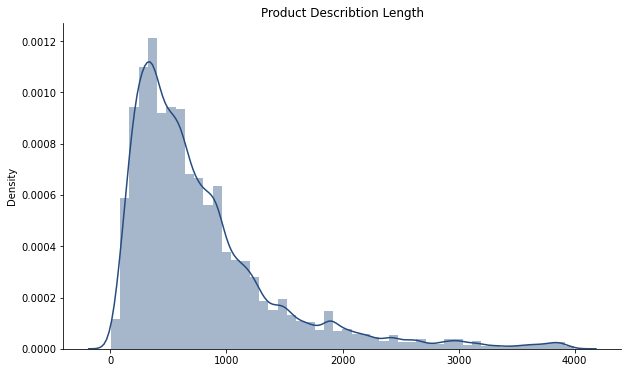

In [45]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df.product_description_lenght)
plt.title('Product Describtion Length')
sns.despine()

##### " Product Photos Quantity " 

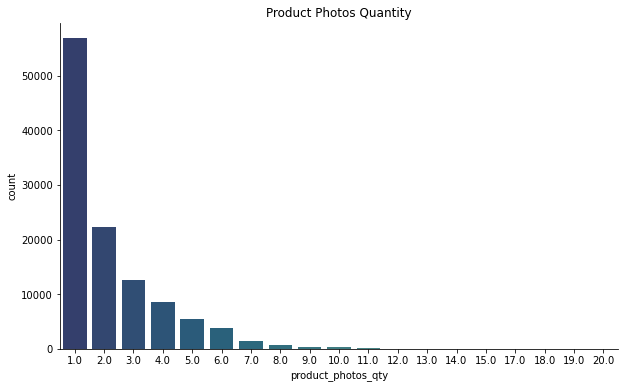

In [46]:
plt.figure(figsize=[10, 6])
sns.countplot(x = df.product_photos_qty, palette= 'crest_r')
plt.title('Product Photos Quantity')
sns.despine()

##### " Product Weight "

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


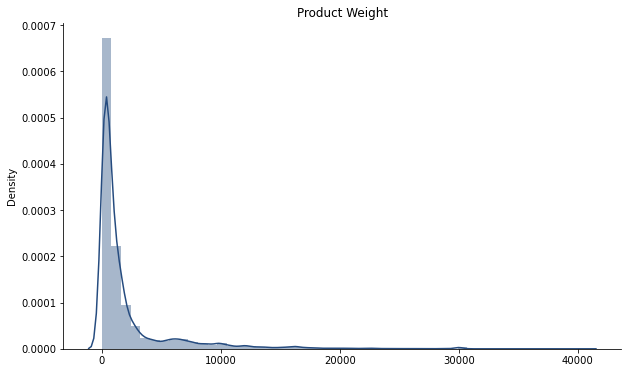

In [47]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df.product_weight_g)
plt.title('Product Weight')
sns.despine()

##### " Product Volume "

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


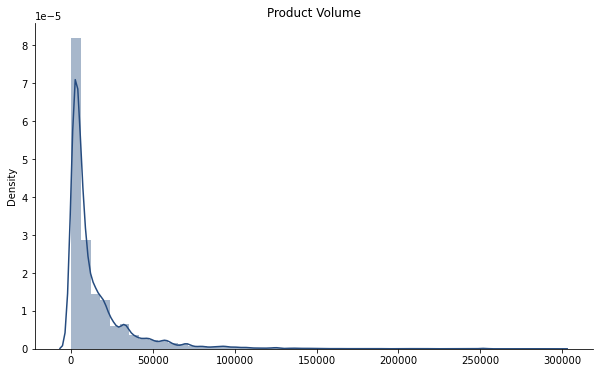

In [48]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df.product_vol_cm3)
plt.title('Product Volume')
sns.despine()

##### " Payment Type "

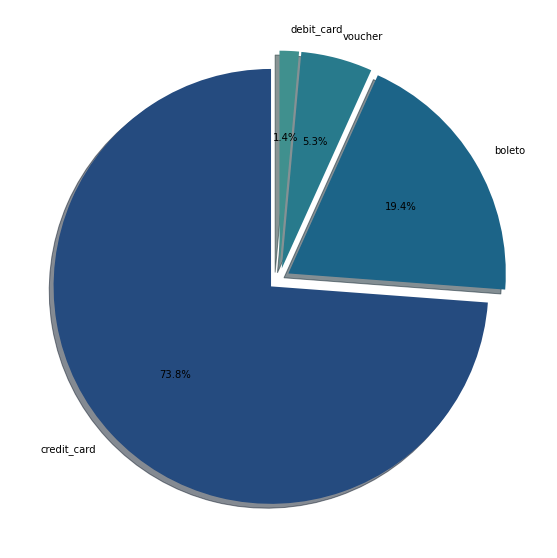

In [49]:
plt.figure(figsize=[10, 10])
plt.pie(df.payment_type.value_counts().values, explode=(0.05, 0.05, 0.05, 0.05), labels= df.payment_type.value_counts().index, autopct='%1.1f%%',shadow=True, startangle=90);

##### " Payment Installments "

In [50]:
df.payment_installments.value_counts()

1     56117
2     13093
3     11255
4      7635
10     6574
5      5779
8      4844
6      4417
7      1721
9       685
12      157
15       85
18       38
24       34
11       22
20       19
13       18
14       15
16        7
17        7
21        6
0         3
22        1
23        1
Name: payment_installments, dtype: int64

In [51]:
df[df.payment_installments == 0]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,product_category,product_vol_cm3,estimated_days,arrival_days,shipping_days,seller_to_carrier_status,arrival_status,estimated_delivery_rate,arrival_delivery_rate,shipping_delivery_rate
28825,48ebb06cf56dba9d009230cc751bb195,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,1a57108394169c0b47d8f876acc9ba2d,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-17 12:37:00,2018-05-24 15:45:41,...,Home & Garden,5819.0,22,9,7,OnTime/Early,OnTime/Early,Neutral,Fast,Very Fast
28826,48ebb06cf56dba9d009230cc751bb195,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,1a57108394169c0b47d8f876acc9ba2d,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-17 12:37:00,2018-05-24 15:45:41,...,Home & Garden,5819.0,22,9,7,OnTime/Early,OnTime/Early,Neutral,Fast,Very Fast
96127,5e5794daaa13f73e2f1cdb4114529843,f54cea27c80dc09bfe07b1cf1e01b845,5263,sao paulo,SP,744bade1fcf9ff3f31d860ace076d422,2018-04-22 11:34:42,2018-04-24 19:04:46,2018-04-24 03:14:34,2018-04-27 20:55:28,...,Electronics,1560.0,24,5,3,OnTime/Early,OnTime/Early,Neutral,Very Fast,Very Fast


##### Since no of installments can't be 0, we should drop these raws

In [52]:
# Drop indices
df.drop([29113, 29114, 96733], inplace=True)

# Reset Index
df.reset_index(inplace= True, drop= True) 

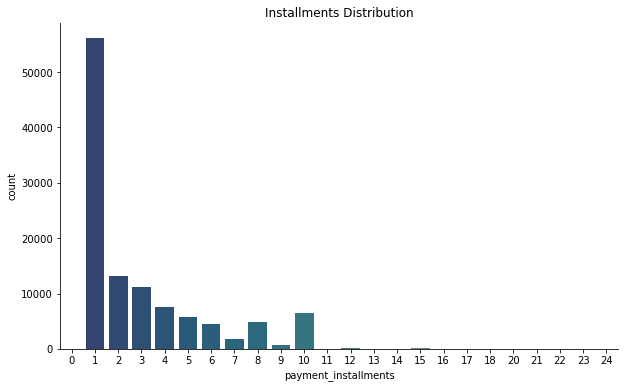

In [53]:
plt.figure(figsize=[10, 6])
sns.countplot(x = df.payment_installments, palette= 'crest_r')
plt.title('Installments Distribution')
sns.despine()

##### " Payment Value "

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


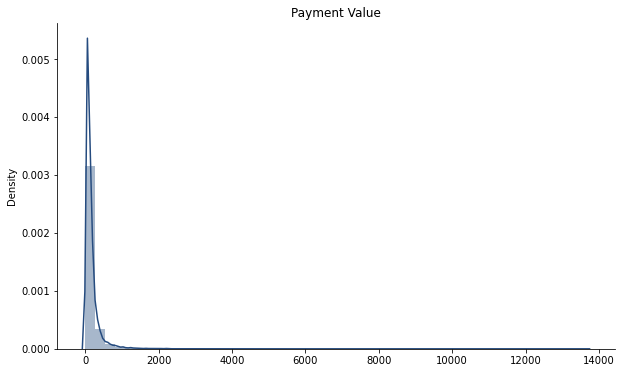

In [54]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df.payment_value)
plt.title('Payment Value')
sns.despine()

##### " Top 10 Cities for Sellers "

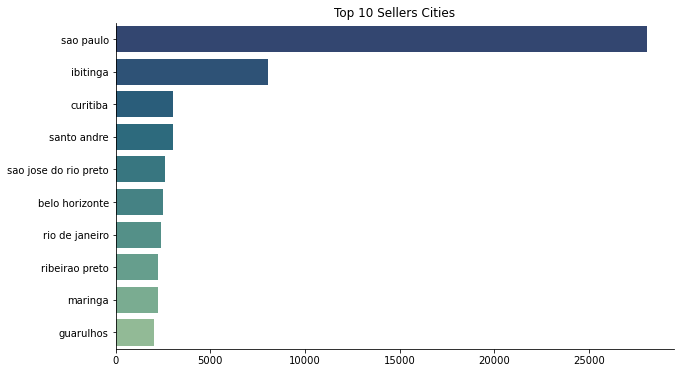

In [55]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.seller_city.value_counts().values[:10], y= df.seller_city.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Sellers Cities')
sns.despine()

##### " Top 10 Sellers Capacity States  "

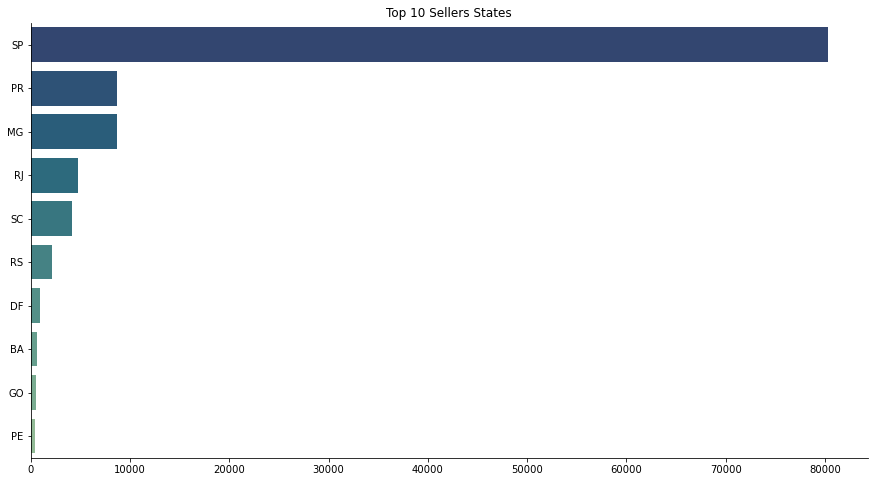

In [56]:
plt.figure(figsize=[15, 8])
sns.barplot(x = df.seller_state.value_counts().values[:10], y= df.seller_state.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Sellers States')
sns.despine()

### 4.2 Multivariate Analysis

### Which Cities have highest Revenue ?

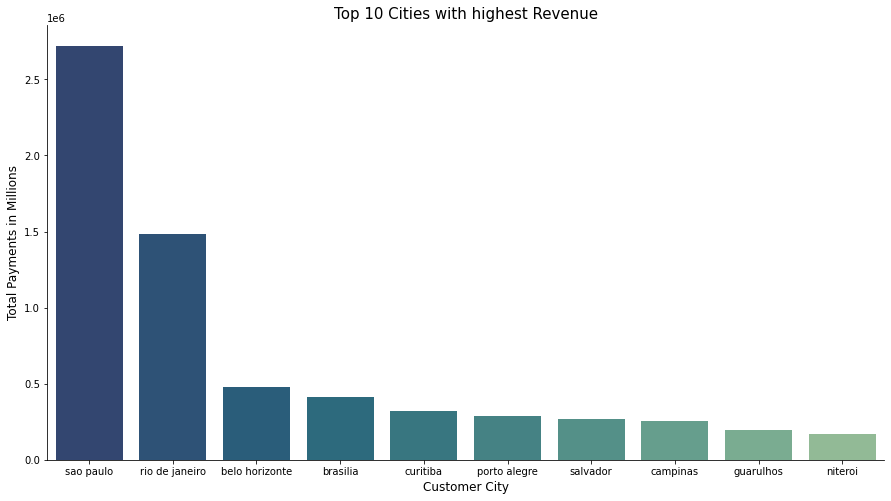

In [57]:
# Group customer city by payment value
revenue_per_city = df.groupby('customer_city')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
revenue_per_city.reset_index(inplace=True)

# plot Top 10 cities with highest revenue
plt.figure(figsize=[15, 8])
sns.barplot(x = revenue_per_city.customer_city[:10], y= revenue_per_city.payment_value[:10], palette= 'crest_r')
plt.title('Top 10 Cities with highest Revenue', fontsize= 15)
plt.xlabel('Customer City', fontsize= 12)
plt.ylabel('Total Payments in Millions',fontsize= 12)
sns.despine()

### What is the average review score for each product category ?

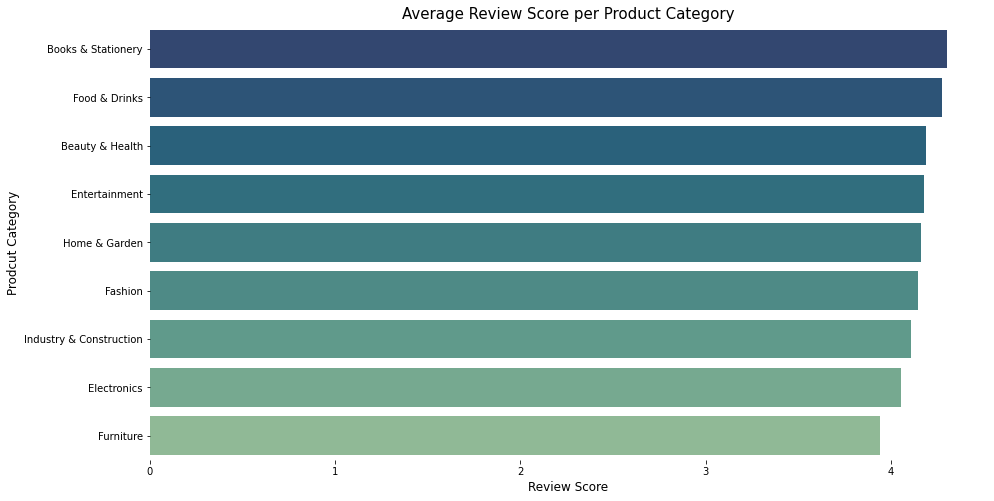

In [58]:
# Filter product category with 4.5 or above
review_per_cat = df.groupby('product_category')[['review_score']].mean().sort_values(by='review_score', ascending=False)
review_per_cat.reset_index(inplace=True)

# Plot Product Category vs Review Score
plt.figure(figsize=[15, 8])
sns.barplot(x = review_per_cat.review_score, y= review_per_cat.product_category, palette= 'crest_r')
plt.title('Average Review Score per Product Category', fontsize= 15)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Prodcut Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

### Are customers more likely to make larger payments using certain payment methods ?

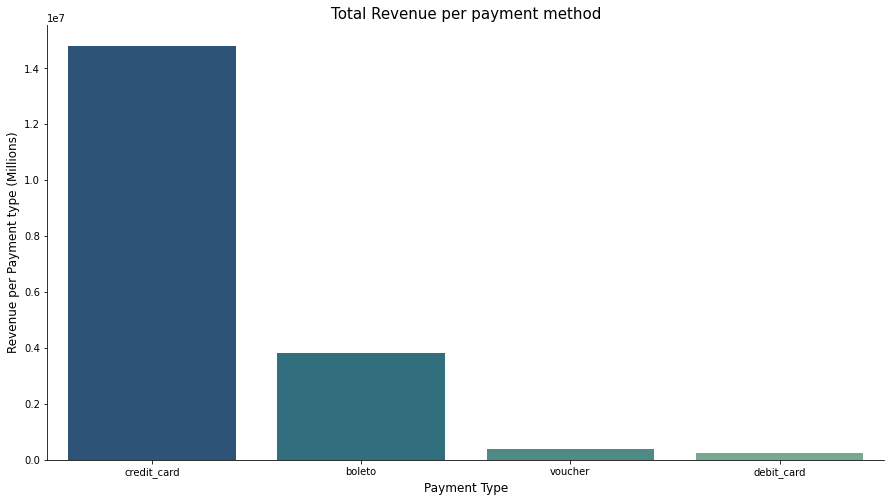

In [59]:
# Group each payment type by average payment value
payment_methods = df.groupby('payment_type')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)

# plot Average payments per payment method
plt.figure(figsize=[15, 8])
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'crest_r')
plt.title('Total Revenue per payment method', fontsize= 15)
plt.xlabel('Payment Type', fontsize= 12)
plt.ylabel('Revenue per Payment type (Millions)', fontsize= 12)
sns.despine()

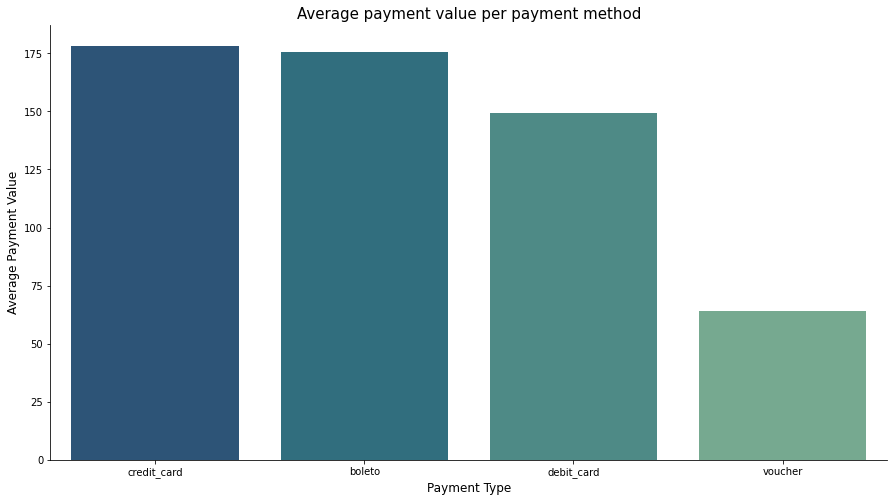

In [61]:
# Group each payment type by average payment value
payment_methods = df.groupby('payment_type')[['payment_value']].mean().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)

# plot Average payments per payment method
plt.figure(figsize=[15, 8])
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'crest_r')
plt.title('Average payment value per payment method', fontsize= 15)
plt.xlabel('Payment Type', fontsize= 12)
plt.ylabel('Average Payment Value', fontsize= 12)
sns.despine()

### What is the average freight value for each product category ?

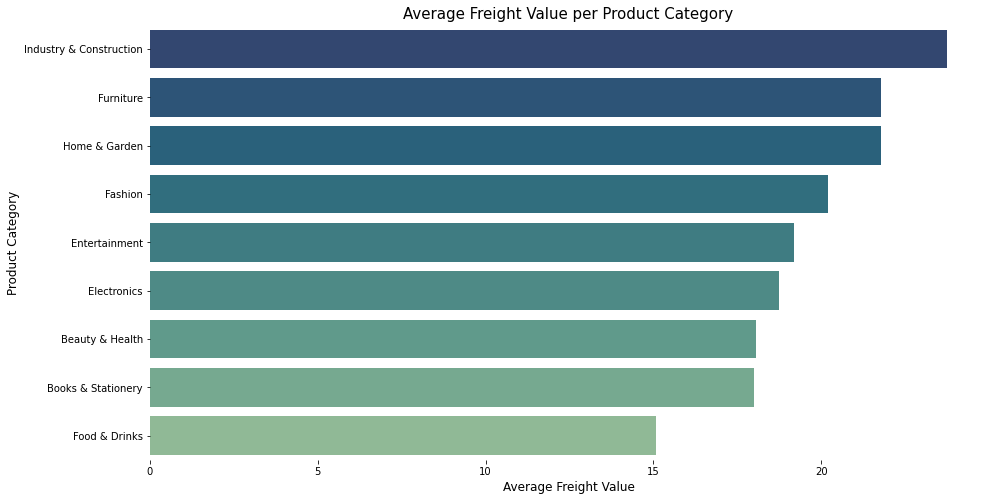

In [62]:
# Group product category by average freight value
freight_per_cat = df.groupby('product_category')[['freight_value']].mean().sort_values(by='freight_value', ascending=False)
freight_per_cat.reset_index(inplace=True)

# plot average freight value per product category
plt.figure(figsize=[15, 8])
sns.barplot(x = freight_per_cat.freight_value, y=  freight_per_cat.product_category, palette= 'crest_r')
plt.title('Average Freight Value per Product Category', fontsize= 15)
plt.xlabel('Average Freight Value',fontsize= 12)
plt.ylabel('Product Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

### What is the average shipping time for each product Category ?

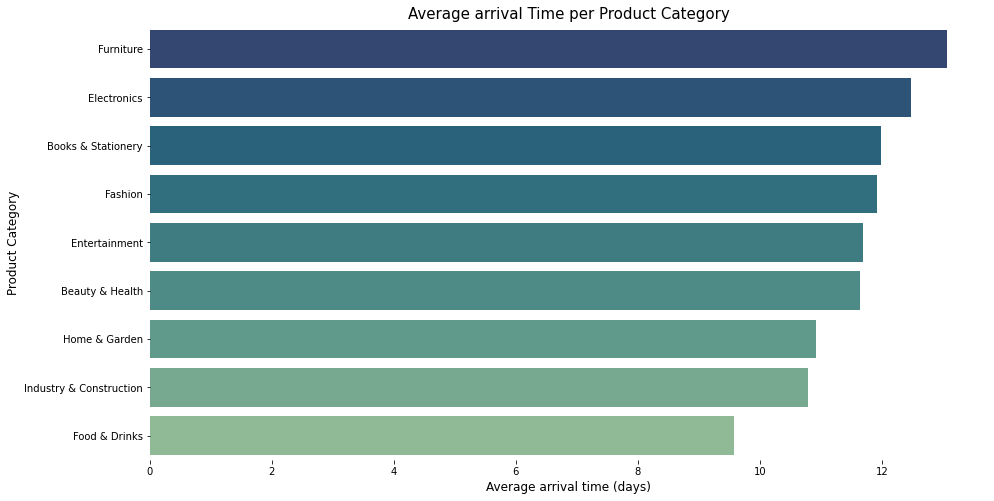

In [63]:
# Group product category by average arrival time
ship_per_cat = df.groupby('product_category')[['arrival_days']].mean().sort_values(by='arrival_days', ascending=False)
ship_per_cat.reset_index(inplace=True)

# plot average freight value per product category
plt.figure(figsize=[15, 8])
sns.barplot(x = ship_per_cat.arrival_days, y=  ship_per_cat.product_category, palette= 'crest_r')
plt.title('Average arrival Time per Product Category', fontsize= 15)
plt.xlabel('Average arrival time (days)',fontsize= 12)
plt.ylabel('Product Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

### Are Transactions done with Vouchers lead to high review score ?

<AxesSubplot:xlabel='review_score', ylabel='count'>

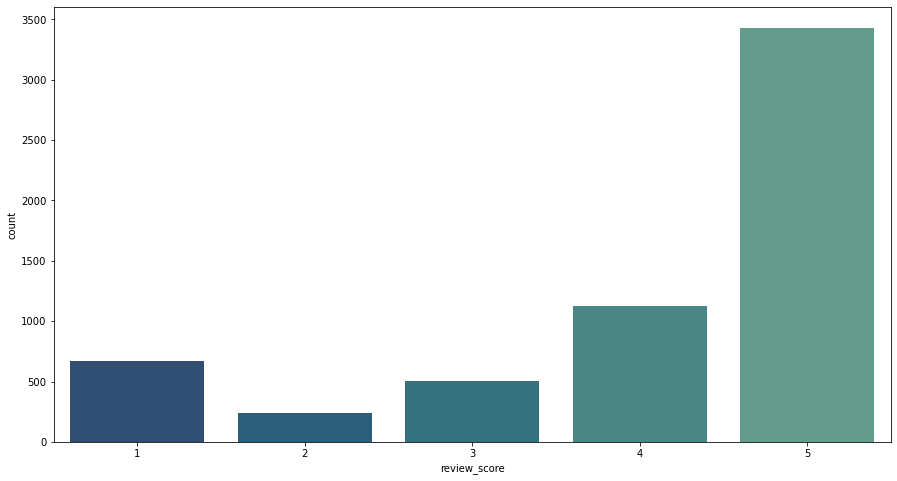

In [64]:
plt.figure(figsize=[15, 8])
voucher_trans = df[df.payment_type == 'voucher']
sns.countplot(x= voucher_trans.review_score)

### How accurate are the estimated delivery dates provided to customers ?

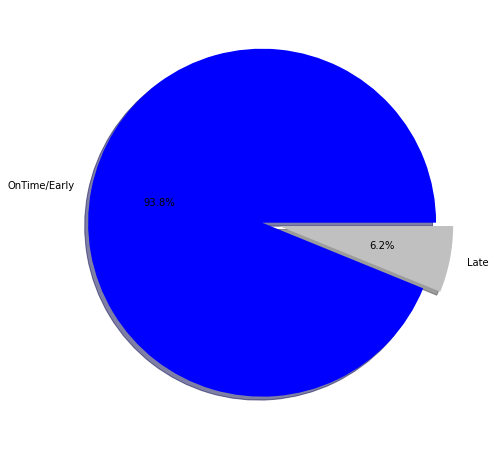

In [65]:
plt.figure(figsize=[30,8])
Values = df.arrival_status.value_counts().values
Labels = df.arrival_status.value_counts().index
plt.pie(Values, explode=(0.05, 0.05), labels= ['OnTime/Early', 'Late'], autopct='%1.1f%%', shadow=True, colors= ('#0000FF', '#C0C0C0'));

### Distribution of products categories by location ?

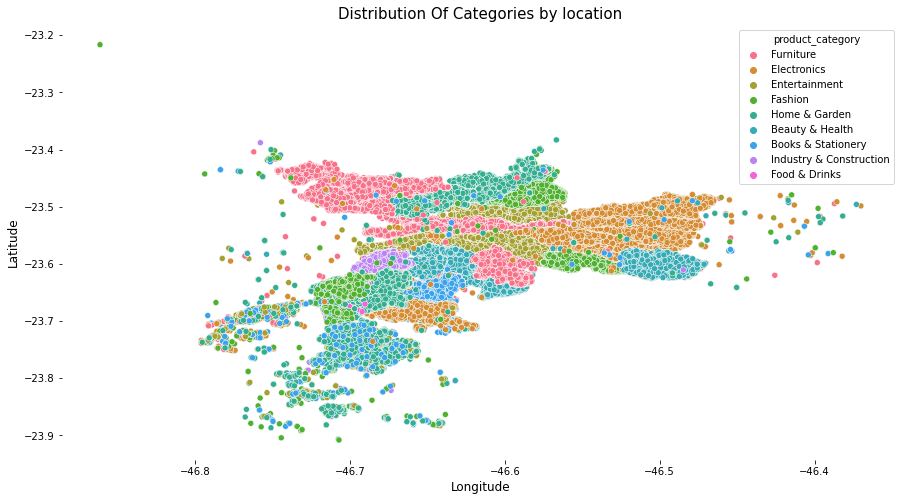

In [66]:
plt.figure(figsize=[15, 8])
sns.scatterplot(x = geolocation_df.geolocation_lng, y = geolocation_df.geolocation_lat, hue= df.product_category)
plt.title('Distribution Of Categories by location', fontsize= 15)
plt.xlabel('Longitude',fontsize= 12)
plt.ylabel('Latitude', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);sns.despine()

In [67]:
# Create copy of DataFrame
df_2 = df.copy()

# Save sample for EDA Deployment
EDA_df = df_2.drop(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'order_id', 'review_id', 'order_item_id', 'product_id', 'seller_id', 'seller_zip_code_prefix', 'product_category_name'], axis= 1)
EDA_sample = EDA_df.sample(frac= 1)[:10000]
EDA_sample.to_csv('EDA.csv')

# 5.0 Data Preprocessing

### 5.1 Drop Unneccessary Features

In [ ]:
# Drop all ids, zip codes, datetimes, review comment and title, product length

df.drop(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_id', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
        'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
        'order_item_id', 'product_id', 'seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'shipping_limit_date', 'product_category_name',
        'product_category_name_english', 'product_category', 'product_weight_g', 'product_name_lenght',
        'product_vol_cm3'], axis= 1, inplace= True)

<AxesSubplot:>

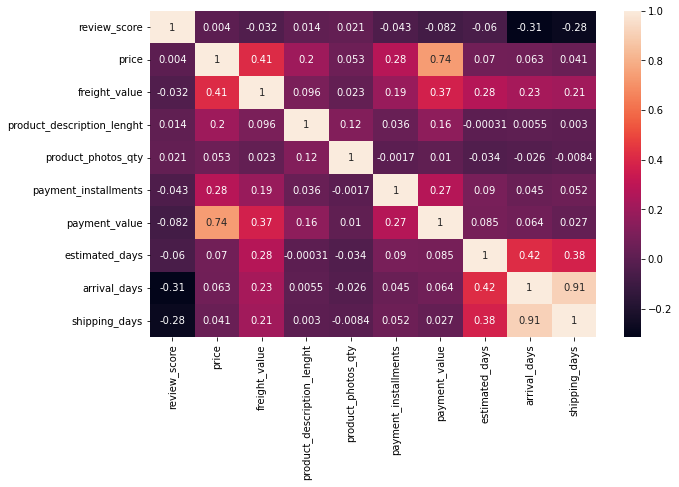

In [ ]:
# Show Correlation between Features
plt.figure(figsize= [10, 6])
sns.heatmap(df.corr(), annot= True)

In [ ]:
# Remove features with high correlations
df.drop(['shipping_days', 'price'], axis= 1, inplace= True)

In [ ]:
df.head()

,review_score,freight_value,product_description_lenght,product_photos_qty,payment_type,payment_installments,payment_value,estimated_days,arrival_days,seller_to_carrier_status,arrival_status,estimated_delivery_rate,arrival_delivery_rate,shipping_delivery_rate
0,4,21.88,1141.0,1.0,credit_card,2,146.87,20,9,Late,OnTime/Early,Neutral,Fast,Very Fast
1,1,24.90,1141.0,1.0,credit_card,1,275.79,40,19,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast
2,1,24.90,1141.0,1.0,credit_card,1,275.79,40,19,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast
3,3,15.62,1141.0,1.0,credit_card,7,140.61,36,19,OnTime/Early,OnTime/Early,Slow,Neutral,Very Fast
4,4,30.59,1141.0,1.0,credit_card,10,137.58,47,25,Late,OnTime/Early,Very Slow,Slow,Fast


#### Convert Review Score from Multiclass to Binary

In [ ]:
encoded_class = { 1 : 'Not Satisfied',
                  2 : 'Not Satisfied', 
                  3 : 'Not Satisfied', 
                  4 : 'Satisfied', 
                  5 : 'Satisfied'}

df['review_score'] = df['review_score'].map(encoded_class)

#### Split Data into Input Features & Target Variable

In [ ]:
X = df.drop('review_score', axis=1)
y = df['review_score']

### 5.2 Handling Categorical Features

#### Handling Ordinal Features ( Label Encoding)

In [ ]:
labels = {'Very Slow' : 1, 
          'Slow' : 2, 
          'Neutral' : 3, 
          'Fast' : 4, 
          'Very Fast' : 5}

X.estimated_delivery_rate = X.estimated_delivery_rate.map(labels)
X.shipping_delivery_rate = X.shipping_delivery_rate.map(labels)
X.arrival_delivery_rate = X.arrival_delivery_rate.map(labels)

#### Handling Nominal Features ( One Hot Encoding )

In [ ]:
X = pd.get_dummies(X, drop_first=True)

#### Split Data into Train & Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42, stratify= y)

### 5.3 Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
fs = SelectKBest(mutual_info_classif, k= 'all')
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

##### Plotting Featres as per importance

<AxesSubplot:>

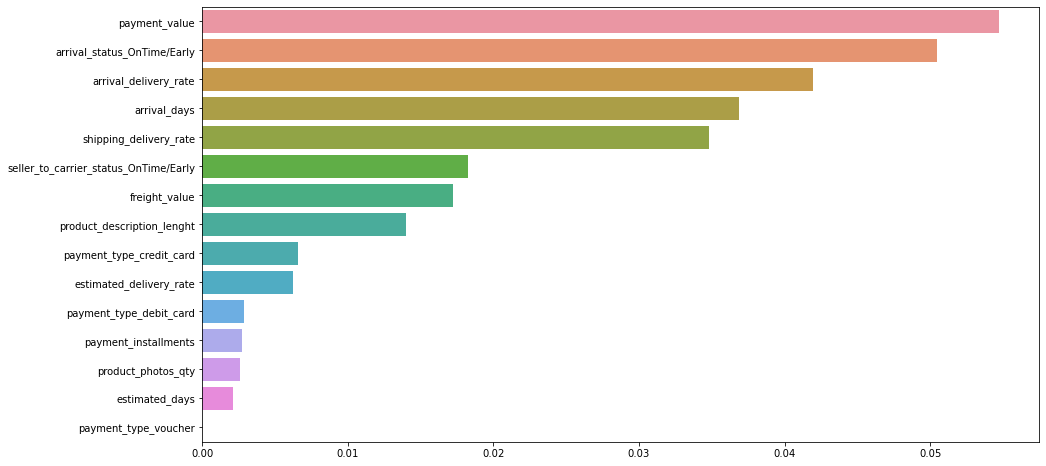

In [ ]:
# Get the indices sorted by most important to least important
plt.figure(figsize=[15, 8])
indices = np.argsort(fs.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(15):
    features.append(fs.feature_names_in_[indices[i]])

# Now plot
sns.barplot(x = fs.scores_[indices[range(15)]], y = features)

#### Select best 9 Features

In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
fs = SelectKBest(mutual_info_classif, k= 9)
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [ ]:
x_train_fs = pd.DataFrame(x_train_fs, columns= fs.get_feature_names_out())
x_test_fs = pd.DataFrame(x_test_fs, columns= fs.get_feature_names_out())

### 5.4 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean= False)
x_train_scaled = sc.fit_transform(x_train_fs)
x_test_scaled = sc.transform(x_test_fs)

##### Convert Array to Dataframe

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns= sc.get_feature_names_out())
x_test_scaled = pd.DataFrame(x_test_scaled, columns= sc.get_feature_names_out())

### 5.5 Handling Imbalance

##### Check imbalance percentage

In [ ]:
round((y_train.value_counts() / y_train.shape[0]) * 100, 2)

Satisfied        76.99
Not Satisfied    23.01
Name: review_score, dtype: float64

##### Use SMOTE for handling imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# 6.0 Modeling

### 6.1 Apply ML Models

### Logistic Regression

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.69      0.42      0.52     69309
    Satisfied       0.58      0.81      0.68     69309

     accuracy                           0.62    138618
    macro avg       0.64      0.62      0.60    138618
 weighted avg       0.64      0.62      0.60    138618

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.40      0.43      0.41      5179
    Satisfied       0.83      0.81      0.82     17327

     accuracy                           0.72     22506
    macro avg       0.61      0.62      0.62     22506
 weighted avg       0.73      0.72      0.72     22506



c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


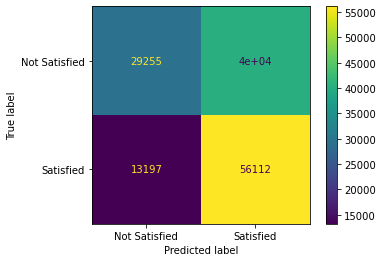

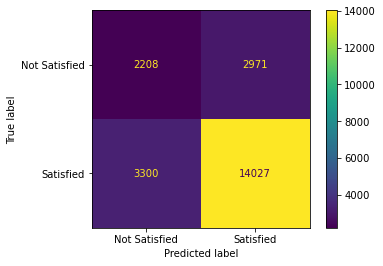

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix

lr = LogisticRegression()
lr.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, lr.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, lr.predict(x_test_scaled)))

plot_confusion_matrix(lr, x_train_resampled, y_train_resampled)
plot_confusion_matrix(lr, x_test_scaled, y_test)

### KNN Classifier

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.82      0.94      0.88     69309
    Satisfied       0.93      0.79      0.86     69309

     accuracy                           0.87    138618
    macro avg       0.88      0.87      0.87    138618
 weighted avg       0.88      0.87      0.87    138618

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.37      0.59      0.46      5179
    Satisfied       0.85      0.70      0.77     17327

     accuracy                           0.67     22506
    macro avg       0.61      0.65      0.61     22506
 weighted avg       0.74      0.67      0.70     22506



c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


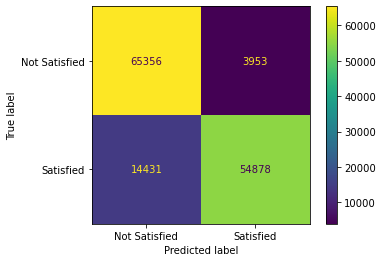

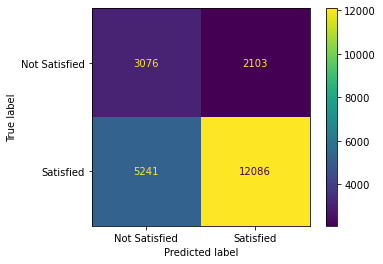

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, knn.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, knn.predict(x_test_scaled)))

plot_confusion_matrix(knn,x_train_resampled,y_train_resampled)
plot_confusion_matrix(knn, x_test_scaled, y_test)

### Decision Tree

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.99      1.00      1.00     69309
    Satisfied       1.00      0.99      1.00     69309

     accuracy                           1.00    138618
    macro avg       1.00      1.00      1.00    138618
 weighted avg       1.00      1.00      1.00    138618

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.43      0.54      0.48      5179
    Satisfied       0.85      0.79      0.82     17327

     accuracy                           0.73     22506
    macro avg       0.64      0.66      0.65     22506
 weighted avg       0.75      0.73      0.74     22506



c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


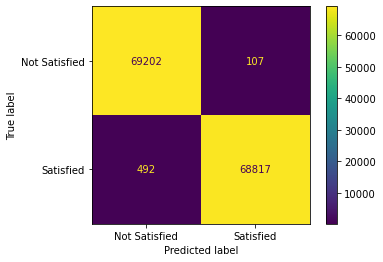

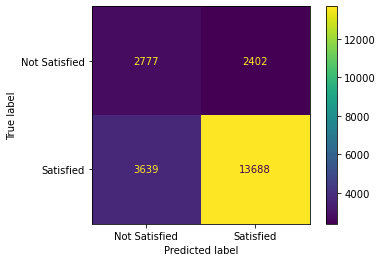

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, dt.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, dt.predict(x_test_scaled)))

plot_confusion_matrix(dt,x_train_resampled,y_train_resampled)
plot_confusion_matrix(dt, x_test_scaled, y_test)

### Random Forest

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       1.00      0.99      1.00     69309
    Satisfied       0.99      1.00      1.00     69309

     accuracy                           1.00    138618
    macro avg       1.00      1.00      1.00    138618
 weighted avg       1.00      1.00      1.00    138618

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.59      0.50      0.54      5179
    Satisfied       0.86      0.90      0.88     17327

     accuracy                           0.80     22506
    macro avg       0.72      0.70      0.71     22506
 weighted avg       0.79      0.80      0.80     22506



c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


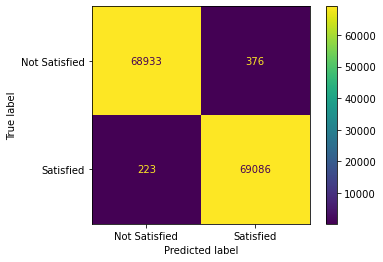

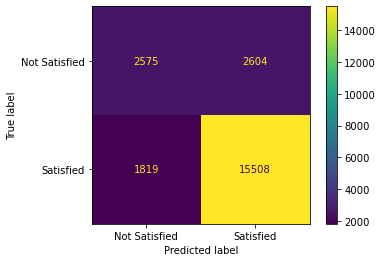

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, rf.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, rf.predict(x_test_scaled)))

plot_confusion_matrix(rf, x_train_resampled, y_train_resampled)
plot_confusion_matrix(rf, x_test_scaled, y_test)

### Ada Boost

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.69      0.48      0.57     69309
    Satisfied       0.60      0.78      0.68     69309

     accuracy                           0.63    138618
    macro avg       0.65      0.63      0.63    138618
 weighted avg       0.65      0.63      0.63    138618

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.39      0.45      0.42      5179
    Satisfied       0.83      0.79      0.81     17327

     accuracy                           0.71     22506
    macro avg       0.61      0.62      0.61     22506
 weighted avg       0.73      0.71      0.72     22506



c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


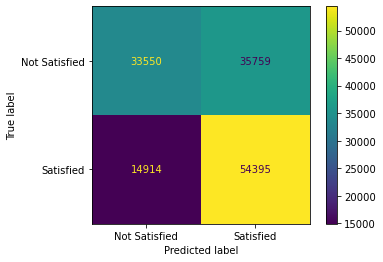

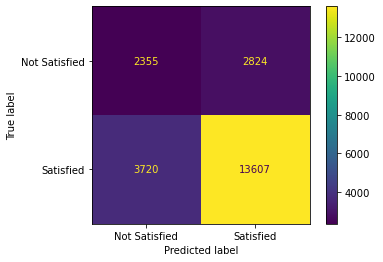

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier()
ad.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, ad.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, ad.predict(x_test_scaled)))

plot_confusion_matrix(ad, x_train_resampled, y_train_resampled)
plot_confusion_matrix(ad, x_test_scaled, y_test)

### XGboost

Evaluation on Training 
               precision    recall  f1-score   support

           0       0.90      0.63      0.74     69309
           1       0.72      0.93      0.81     69309

    accuracy                           0.78    138618
   macro avg       0.81      0.78      0.78    138618
weighted avg       0.81      0.78      0.78    138618

Evaluation on Testing 
               precision    recall  f1-score   support

           0       0.55      0.35      0.43      5179
           1       0.83      0.91      0.87     17327

    accuracy                           0.78     22506
   macro avg       0.69      0.63      0.65     22506
weighted avg       0.76      0.78      0.77     22506



c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


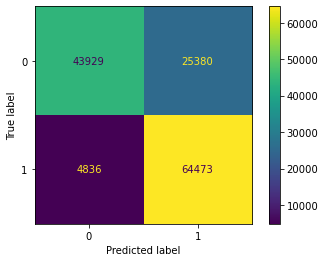

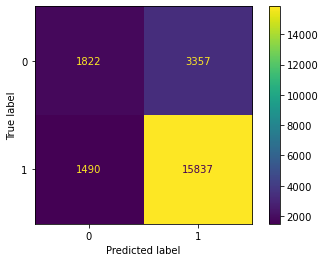

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_xg = le.fit_transform(y_train_resampled)
y_test_xg = le.fit_transform(y_test)
xg = XGBClassifier()
xg.fit(x_train_resampled, y_train_xg)

print('Evaluation on Training \n', classification_report(y_train_xg, xg.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test_xg, xg.predict(x_test_scaled)))

plot_confusion_matrix(xg, x_train_resampled, y_train_xg)
plot_confusion_matrix(xg, x_test_scaled, y_test_xg)

### Naive Bayes

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.72      0.35      0.47     69309
    Satisfied       0.57      0.86      0.69     69309

     accuracy                           0.61    138618
    macro avg       0.65      0.61      0.58    138618
 weighted avg       0.65      0.61      0.58    138618

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.44      0.36      0.39      5179
    Satisfied       0.82      0.86      0.84     17327

     accuracy                           0.75     22506
    macro avg       0.63      0.61      0.62     22506
 weighted avg       0.73      0.75      0.74     22506



c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


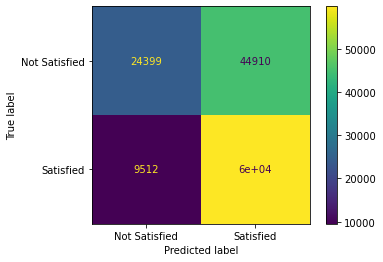

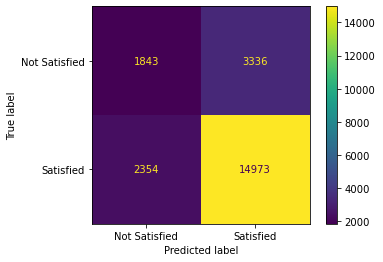

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, plot_confusion_matrix

nb = GaussianNB()
nb.fit(x_train_resampled, y_train_resampled)
y_pred = nb.predict(x_test_scaled)

print('Evaluation on Training \n', classification_report(y_train_resampled, nb.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, nb.predict(x_test_scaled)))

plot_confusion_matrix(nb, x_train_resampled, y_train_resampled)
plot_confusion_matrix(nb, x_test_scaled, y_test)

### LightGBM

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.88      0.56      0.69     69309
    Satisfied       0.68      0.92      0.78     69309

     accuracy                           0.74    138618
    macro avg       0.78      0.74      0.73    138618
 weighted avg       0.78      0.74      0.73    138618

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.56      0.34      0.42      5179
    Satisfied       0.82      0.92      0.87     17327

     accuracy                           0.79     22506
    macro avg       0.69      0.63      0.65     22506
 weighted avg       0.76      0.79      0.77     22506



c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


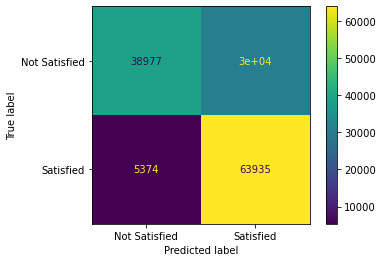

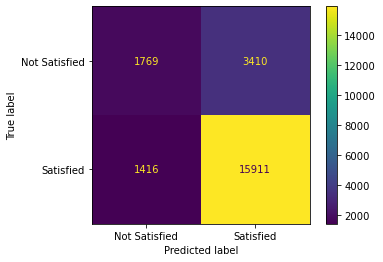

In [ ]:
import lightgbm as ltb

lg = ltb.LGBMClassifier()
lg.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, lg.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, lg.predict(x_test_scaled)))

plot_confusion_matrix(lg, x_train_resampled, y_train_resampled)
plot_confusion_matrix(lg, x_test_scaled, y_test)

In [ ]:
! pip install catboost

### CatBoost

Learning rate set to 0.084624
0:	learn: 0.6823809	total: 528ms	remaining: 8m 47s
1:	learn: 0.6727305	total: 693ms	remaining: 5m 46s
2:	learn: 0.6640268	total: 849ms	remaining: 4m 41s
3:	learn: 0.6579464	total: 936ms	remaining: 3m 53s
4:	learn: 0.6520828	total: 1.03s	remaining: 3m 24s
5:	learn: 0.6473676	total: 1.13s	remaining: 3m 7s
6:	learn: 0.6420148	total: 1.23s	remaining: 2m 54s
7:	learn: 0.6391014	total: 1.32s	remaining: 2m 43s
8:	learn: 0.6360239	total: 1.42s	remaining: 2m 36s
9:	learn: 0.6320128	total: 1.5s	remaining: 2m 28s
10:	learn: 0.6264585	total: 1.56s	remaining: 2m 20s
11:	learn: 0.6244286	total: 1.64s	remaining: 2m 15s
12:	learn: 0.6218838	total: 1.71s	remaining: 2m 9s
13:	learn: 0.6200140	total: 1.8s	remaining: 2m 6s
14:	learn: 0.6170580	total: 1.98s	remaining: 2m 10s
15:	learn: 0.6151424	total: 2.06s	remaining: 2m 6s
16:	learn: 0.6125749	total: 2.15s	remaining: 2m 4s
17:	learn: 0.6104505	total: 2.2s	remaining: 1m 59s
18:	learn: 0.6090984	total: 2.26s	remaining: 1m 56s


c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


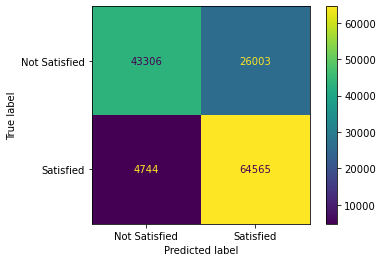

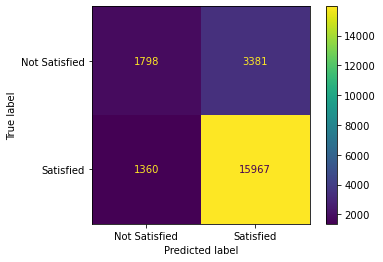

In [ ]:
import catboost as cb

cb = cb.CatBoostClassifier()
cb.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, cb.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, cb.predict(x_test_scaled)))

plot_confusion_matrix(cb, x_train_resampled, y_train_resampled)
plot_confusion_matrix(cb, x_test_scaled, y_test)

### 6.2 Hyperparameter Tuning

#### XGboost

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [5, 7, 8],
    'n_estimators': [100, 200] 
    }
grid_search = GridSearchCV(xg, param_grid= param_grid, cv= 5, scoring= 'f1_macro')
grid_search.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [5, 7, 8],
                         'n_estimators': [100, 200]},
             scoring='f1_macro')

In [ ]:
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200}

In [ ]:
final_xg_model = XGBClassifier(learning_rate= 0.2, max_depth= 8, n_estimators= 200)
final_xg_model.fit(x_train_resampled, y_train_xg)

print('Evaluation on Training \n', classification_report(y_train_xg, final_xg_model.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test_xg, final_xg_model.predict(x_test_scaled)))

Evaluation on Training 
               precision    recall  f1-score   support

           0       0.94      0.74      0.83     69309
           1       0.79      0.95      0.86     69309

    accuracy                           0.85    138618
   macro avg       0.86      0.85      0.84    138618
weighted avg       0.86      0.85      0.84    138618

Evaluation on Testing 
               precision    recall  f1-score   support

           0       0.59      0.39      0.47      5179
           1       0.83      0.92      0.87     17327

    accuracy                           0.80     22506
   macro avg       0.71      0.65      0.67     22506
weighted avg       0.78      0.80      0.78     22506



In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'depth': [5, 7, 8],
    'iterations': [100, 200]}

grid_search = GridSearchCV(cb, param_grid= param_grid, cv= 5, scoring= 'f1_macro')
grid_search.fit(x_train_resampled, y_train_resampled)
grid_search.best_params_ 

In [ ]:
import catboost as cb
final_cb_model = cb.CatBoostClassifier(depth= 7, iterations= 200, learning_rate= 0.2)
final_cb_model.fit(x_train_resampled,y_train_resampled)
print('Evaluation on Training \n', classification_report(y_train_resampled, final_cb_model.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, final_cb_model.predict(x_test_scaled)))

0:	learn: 0.6561043	total: 106ms	remaining: 21.1s
1:	learn: 0.6275994	total: 214ms	remaining: 21.2s
2:	learn: 0.6003111	total: 328ms	remaining: 21.6s
3:	learn: 0.5865983	total: 621ms	remaining: 30.4s
4:	learn: 0.5751719	total: 1.01s	remaining: 39.3s
5:	learn: 0.5675111	total: 1.15s	remaining: 37.1s
6:	learn: 0.5620618	total: 1.27s	remaining: 35.1s
7:	learn: 0.5497374	total: 1.41s	remaining: 33.9s
8:	learn: 0.5432332	total: 1.55s	remaining: 33s
9:	learn: 0.5314723	total: 1.68s	remaining: 32s
10:	learn: 0.5272078	total: 1.78s	remaining: 30.6s
11:	learn: 0.5179267	total: 1.93s	remaining: 30.2s
12:	learn: 0.5164057	total: 2.13s	remaining: 30.6s
13:	learn: 0.5094464	total: 2.29s	remaining: 30.5s
14:	learn: 0.5010373	total: 2.45s	remaining: 30.2s
15:	learn: 0.4983587	total: 2.56s	remaining: 29.4s
16:	learn: 0.4967148	total: 2.68s	remaining: 28.8s
17:	learn: 0.4871668	total: 2.92s	remaining: 29.5s
18:	learn: 0.4858147	total: 3.16s	remaining: 30.1s
19:	learn: 0.4841712	total: 3.38s	remaining: 

#### RandomForest

In [ ]:
param_grid = {
    'max_depth': [8, 9, 10],
    'n_estimators': [100, 200]
    }
grid_search = GridSearchCV(rf, param_grid= param_grid, cv= 5, scoring= 'f1_macro')
grid_search.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10], 'n_estimators': [100, 200]},
             scoring='f1_macro')

In [ ]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [ ]:
final_rf_model = RandomForestClassifier(n_estimators= 200, max_depth= 10)
final_rf_model.fit(x_train_resampled,y_train_resampled)
print('Evaluation on Training \n', classification_report(y_train_resampled, final_rf_model.predict(x_train_resampled)))
print('Evaluation on Training \n', classification_report(y_test, final_rf_model.predict(x_test_scaled)))

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.79      0.53      0.63     69309
    Satisfied       0.65      0.86      0.74     69309

     accuracy                           0.69    138618
    macro avg       0.72      0.69      0.69    138618
 weighted avg       0.72      0.69      0.69    138618

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.45      0.41      0.43      5179
    Satisfied       0.83      0.85      0.84     17327

     accuracy                           0.75     22506
    macro avg       0.64      0.63      0.63     22506
 weighted avg       0.74      0.75      0.74     22506



#### Select XGboost for pipeline as it provides highest performance on testing

# 7.0 Pipeline

In [ ]:
df_pipeline = df.copy()
df_pipeline.head()

,review_score,freight_value,product_description_lenght,product_photos_qty,payment_type,payment_installments,payment_value,estimated_days,arrival_days,seller_to_carrier_status,arrival_status,estimated_delivery_rate,arrival_delivery_rate,shipping_delivery_rate
0,Satisfied,21.88,1141.0,1.0,credit_card,2,146.87,20,9,Late,OnTime/Early,Neutral,Fast,Very Fast
1,Not Satisfied,24.90,1141.0,1.0,credit_card,1,275.79,40,19,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast
2,Not Satisfied,24.90,1141.0,1.0,credit_card,1,275.79,40,19,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast
3,Not Satisfied,15.62,1141.0,1.0,credit_card,7,140.61,36,19,OnTime/Early,OnTime/Early,Slow,Neutral,Very Fast
4,Satisfied,30.59,1141.0,1.0,credit_card,10,137.58,47,25,Late,OnTime/Early,Very Slow,Slow,Fast


#### Encoding Review score to 0 and 1

In [ ]:
encoded_class = { 'Not Satisfied' : 0,
                  'Satisfied' : 1,
                }

df_pipeline['review_score'] = df_pipeline['review_score'].map(encoded_class)

### Split Input Features and Targe Variable

In [ ]:
X = df_pipeline.drop('review_score', axis=1)
y = df_pipeline['review_score']

### Split into Train & Test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

### Prepare Numerical Features

In [ ]:
numeric_columns = x_train.select_dtypes(exclude = 'object').columns
numeric_columns

Index(['freight_value', 'product_description_lenght', 'product_photos_qty',
       'payment_installments', 'payment_value', 'estimated_days',
       'arrival_days'],
      dtype='object')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_pipeline = Pipeline(steps=[('Handle Missing Values', SimpleImputer(strategy= 'median')), 
                                    ('Feature Scaling', StandardScaler(with_mean=False))])

### Prepare Categorical Features

In [ ]:
cat_columns = x_train.select_dtypes(include = 'object').columns
cat_columns

Index(['payment_type', 'seller_to_carrier_status', 'arrival_status',
       'estimated_delivery_rate', 'arrival_delivery_rate',
       'shipping_delivery_rate'],
      dtype='object')

In [ ]:
cat_pipeline = Pipeline(steps=[('Handle Missing Values', SimpleImputer(strategy= 'most_frequent')),
                                ('OneHot Encoding', OneHotEncoder(drop= 'first')),
                                ('Feature Scaling', StandardScaler(with_mean= False))])

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers=[('Numerical Columns', numerical_pipeline, numeric_columns),
                                                ('Cat Columns', cat_pipeline, cat_columns)], remainder= 'passthrough')
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('Numerical Columns',
                                 Pipeline(steps=[('Handle Missing Values',
                                                  SimpleImputer(strategy='median')),
                                                 ('Feature Scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['freight_value', 'product_description_lenght', 'product_photos_qty',
       'payment_installments', 'payment_value', 'estimated_days',
       'arrival_days'],
      dty...
                                ('Cat Columns',
                                 Pipeline(steps=[('Handle Missing Values',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHot Encoding',
                                                  OneHotEncoder(drop='first')),
                                                 ('Feature Scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['payment_type', 'seller_to_carrier_status', 'arrival_status',
       'estimated_delivery_rate', 'arrival_delivery_rate',
       'shipping_delivery_rate'],
      dtype='object'))])

In [283]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

final_pipeline = Pipeline(steps=[('Preprocessing', preprocessing), ('Smote', SMOTE()), 
                                ('Model', XGBClassifier(learning_rate= 0.2, max_depth= 8, n_estimators= 200))])
final_pipeline

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Handle '
                                                                   'Missing '
                                                                   'Values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'product_description_lenght', 'product_photos_qty',
       'payment_installments', 'payment_valu...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [284]:
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Handle '
                                                                   'Missing '
                                                                   'Values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'product_description_lenght', 'product_photos_qty',
       'payment_installments', 'payment_valu...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.2,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=8, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=200, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, ...))])

In [285]:
import joblib
joblib.dump(final_pipeline, 'Brazilian Ecommerce Classification.bkl')

['Brazilian Ecommerce Classification.bkl']

# 8.0 NLP For Customer Satisfaction

In [286]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [70]:
# Remove 'review_comment_title' because of high missing values perentage and remove other features for unneccessity
reviews_df = reviews_df[['review_comment_message', 'review_score']]

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_comment_message  40977 non-null  object
 1   review_score            99224 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [71]:
# Drop missing values
reviews_df.dropna(inplace= True)

# Rename columns for ease
reviews_df.rename(columns = {'review_comment_message' : 'comment', 'review_score' : 'score'}, inplace= True)

# Reset index
reviews_df.reset_index(inplace= True, drop= True)

In [72]:
# Encode scores to be Satisfied or Not Satisfied
encoded_class = { 1 : 'Not Satisfied',
                  2 : 'Not Satisfied', 
                  3 : 'Not Satisfied', 
                  4 : 'Satisfied', 
                  5 : 'Satisfied'}

reviews_df['score'] = reviews_df['score'].map(encoded_class)

#### Text Cleaning & Processing

In [73]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
corpus = []

for i in range(reviews_df.shape[0]):
    # Remove any special characters or number
    comment = re.sub('[^a-zA-Z]', ' ', reviews_df.comment[i])
    # Lower text
    comment = comment.lower()
    # Remove any spaces before or after text
    comment = comment.strip()
    # Split text for stemming
    comment = comment.split()
    # Stemming words in Portugues
    comment = [stemmer.stem(word) for word in comment if word not in set(stopwords.words('portuguese'))]
    # Merge stemmed words to be sentences
    comment = ' '.join(comment)
    
    corpus.append(comment)
    
corpus

['recebi bem ant prazo estipulado',
 'parab ns loja lannist adorei comprar internet seguro pr tico parab ns todo feliz p scoa',
 'aparelho eficient site marca aparelho impresso desinfector chegar outro nome atualizar marca correta vez aparelho',
 'pouco travando valor ta boa',
 'vendedor confi vel produto ok entrega ant prazo',
 'gostaria saber sempr recebi compra agora decpcion',
 'p ssimo',
 'loja nota',
 'obrigado aten amim dispensada',
 'compra realizada facilment entrega efetuada ant prazo dado produto j come usado at present problema',
 'rel gio bonito barato',
 'n gostei comprei gato lebr',
 'sempr compro internet entrega ocorr ant prazo combinado acredito prazo m ximo stark prazo m ximo j esgot ainda n recebi produto',
 'recebi exatament esperava demai encomenda outro vendedor atrasaram chegou prazo',
 'recomendo',
 'boa',
 't completament apaixonada loja super respon vel confi vel',
 'nada chegar pedido',
 'bom cheiroso',
 'otimo vendedor chegou ate ant prazo adorei produto',


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TFIDF Vectorizer to convert text into numbers
tf = TfidfVectorizer()
df_new = tf.fit_transform(corpus).toarray()

In [75]:
df_new = pd.DataFrame(df_new, columns= tf.get_feature_names_out())
df_new

,aa,aaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaguardando,aainda,aancheira,aaprelho,ab,aba,abafada,...,zl,zo,zona,zoo,zoom,zuado,zufer,zumax,zupin,zxdad
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Split into Input Features & Target Variable

In [76]:
X = df_new
y = reviews_df['score']

#### Split data into Train & Test

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.87      0.83      0.85     11557
    Satisfied       0.91      0.94      0.92     21224

     accuracy                           0.90     32781
    macro avg       0.89      0.88      0.89     32781
 weighted avg       0.90      0.90      0.90     32781

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.85      0.80      0.82      2890
    Satisfied       0.89      0.92      0.91      5306

     accuracy                           0.88      8196
    macro avg       0.87      0.86      0.87      8196
 weighted avg       0.88      0.88      0.88      8196



c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


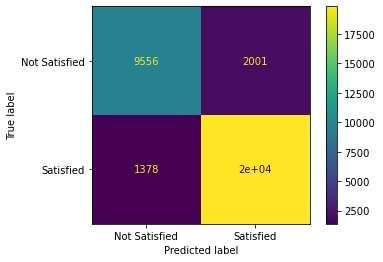

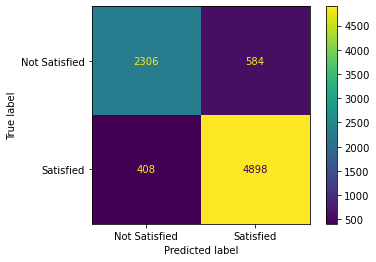

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, plot_confusion_matrix

nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

print('Evaluation on Training \n', classification_report(y_train, nb.predict(x_train)))
print('Evaluation on Testing \n', classification_report(y_test, nb.predict(x_test)))

plot_confusion_matrix(nb, x_train, y_train)
plot_confusion_matrix(nb, x_test, y_test)

##### Now we have a reliable model with better results for classifying customers, Next we should investigate reasons for non-satisfaction ( Target of the analysis )

#### Check Reasons for Non-Satisfaction

In [79]:
# Create a separate DataFrame to check reasons of non satisfaction 
non_satisfied = reviews_df[reviews_df.score == 'Not Satisfied']

# Reset index
non_satisfied.reset_index(inplace= True, drop= True)

#### Text Cleaning & Processing

In [80]:
stemmer = PorterStemmer()
corpus = []

for i in range(non_satisfied.shape[0]):
    comment = re.sub('[^a-zA-Z]', ' ', non_satisfied.comment[i])
    comment = comment.lower()
    comment = comment.strip()
    comment = comment.split()
    comment = [stemmer.stem(word) for word in comment if word not in set(stopwords.words('portuguese'))]
    comment = ' '.join(comment)
    
    corpus.append(comment)
    
corpus

['gostaria saber sempr recebi compra agora decpcion',
 'p ssimo',
 'n gostei comprei gato lebr',
 'sempr compro internet entrega ocorr ant prazo combinado acredito prazo m ximo stark prazo m ximo j esgot ainda n recebi produto',
 'nada chegar pedido',
 'recebi soment control midea split estilo faltou control remoto ar condicionado consul',
 'produto n chegou prazo estipulado causou transtorno pq programei viagem f ria filho baseado prazo moro bahia cuiab sozinho agora casa est vazia',
 'comprei dua unidad s recebi agora fa',
 'produto bom m veio mim n condiz foto an ncio',
 'produto inferior mal acabado',
 'entrega prazo',
 'pedi reembolso resposta at momento',
 'produto chegou pc n conseguiu reconhec porta usb',
 'pedido bald pe bloco montar un r cada n entregu vendido entregu targaryen tapet eva n letra pe crian un r entreg',
 'comprei tre pacot cinco folha cada papel transfer tecido escuro so recebi doi',
 'demor pra entrega',
 'entrega dividida dua n comunicado loja cheguei pensar 

#### Translate sample of non-satisfied comments for comprehension

In [ ]:
# First install deep_translator library
! pip install deep_translator

In [81]:
from deep_translator import GoogleTranslator
import random

non_satisfied_trans = []
random.seed(42)

for sentence in random.sample(corpus, 1000):
    non_satisfied_trans.append(GoogleTranslator(source='portuguese', target='english').translate(sentence))
    
non_satisfied_trans

['aimda product has not arrived',
 'pel cula gel came another device',
 "They didn't deliver the deadline by the t day m. It will be scissors to buy here because the company didn't commit, send an email to reassure",
 'I will not confirm delivery where the product is purchased, it just arrived, only the purchase code tracking says delivery of complicated goods',
 'apparently good product not yet time to test',
 'thanks',
 "I don't inform any order I will receive it The problem happened I can't contact due information",
 'delivery delay product arrived defect',
 'only product delivered rope I did not receive palm',
 'I bought two perfumes, only came in a box to help, counterfeit perfume marked in a forbidden sale box, only for testing',
 "The brush and brush kit did not arrive, it can come separately. Anyway, I didn't like the shipping method, so it informs the product delivered.",
 "delivered quickly I didn't like the product bad fabric",
 "hello i bought product just thermally surpris

In [82]:
# Apply stemming to the translated text
non_satisfied_final = []

for sent in non_satisfied_trans:

    for word in sent.split():

        if word not in set(stopwords.words('english')):

            non_satisfied_final.append(stemmer.stem(word))

non_satisfied_final

['aimda',
 'product',
 'arriv',
 'pel',
 'cula',
 'gel',
 'came',
 'anoth',
 'devic',
 'they',
 'deliv',
 'deadlin',
 'day',
 'm.',
 'it',
 'scissor',
 'buy',
 'compani',
 'commit,',
 'send',
 'email',
 'reassur',
 'i',
 'confirm',
 'deliveri',
 'product',
 'purchased,',
 'arrived,',
 'purchas',
 'code',
 'track',
 'say',
 'deliveri',
 'complic',
 'good',
 'appar',
 'good',
 'product',
 'yet',
 'time',
 'test',
 'thank',
 'i',
 'inform',
 'order',
 'i',
 'receiv',
 'the',
 'problem',
 'happen',
 'i',
 "can't",
 'contact',
 'due',
 'inform',
 'deliveri',
 'delay',
 'product',
 'arriv',
 'defect',
 'product',
 'deliv',
 'rope',
 'i',
 'receiv',
 'palm',
 'i',
 'bought',
 'two',
 'perfumes,',
 'came',
 'box',
 'help,',
 'counterfeit',
 'perfum',
 'mark',
 'forbidden',
 'sale',
 'box,',
 'test',
 'the',
 'brush',
 'brush',
 'kit',
 'arrive,',
 'come',
 'separately.',
 'anyway,',
 'i',
 'like',
 'ship',
 'method,',
 'inform',
 'product',
 'delivered.',
 'deliv',
 'quickli',
 'i',
 'like',
 

(-0.5, 999.5, 799.5, -0.5)

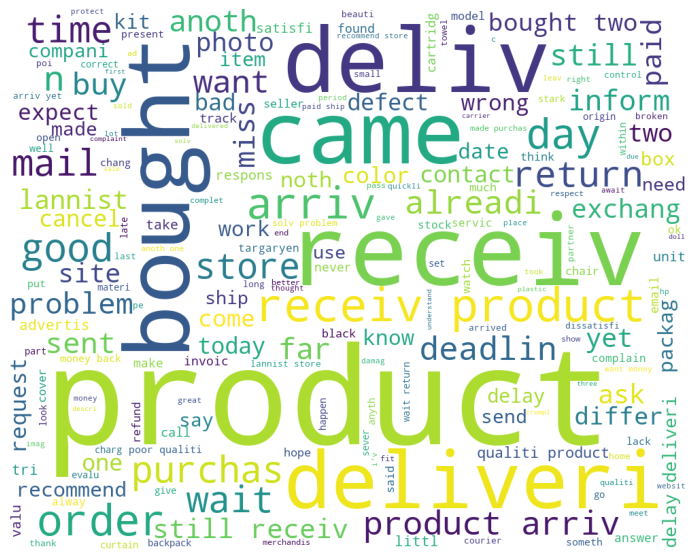

In [83]:
from wordcloud import WordCloud

non_satisfied_final = ' '.join(non_satisfied_final)
non_satisfied_freq = WordCloud(width=1000, height=800, background_color='white').generate(non_satisfied_final)

plt.figure(figsize=(15, 10))
plt.imshow(non_satisfied_freq)
plt.axis("off")

In [84]:
# Sort the word frequencies in descending order
non_satisfied_freq = non_satisfied_freq.process_text(non_satisfied_final)
sorted_word_frequencies = sorted(non_satisfied_freq.items(), key= lambda x : x[1], reverse=True)

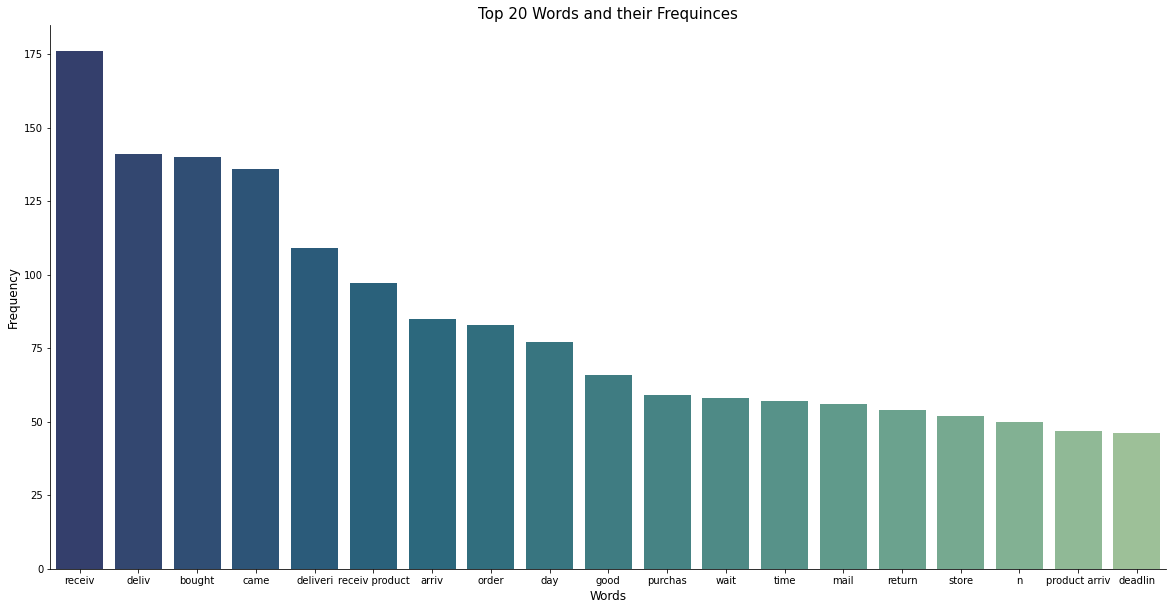

In [87]:
plt.figure(figsize= [20, 10])
sns.barplot(x = pd.DataFrame(sorted_word_frequencies)[1:20][0], y= pd.DataFrame(sorted_word_frequencies)[1:20][1], palette= 'crest_r')
plt.title('Top 20 Words and their Frequinces', fontsize= 15)
plt.xlabel('Words', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
sns.despine()

#### From the study of non-satisfied customers reviews, we can see that majority of words mentioned are related to shipping issues.

# 9.0 Customer Segmentation

### 9.1 Customer Segmentation by RFM Analysis

In [88]:
df_2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,product_category,product_vol_cm3,estimated_days,arrival_days,shipping_days,seller_to_carrier_status,arrival_status,estimated_delivery_rate,arrival_delivery_rate,shipping_delivery_rate
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,Furniture,107136.0,20,9,2,Late,OnTime/Early,Neutral,Fast,Very Fast
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,Furniture,107136.0,40,19,6,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,Furniture,107136.0,40,19,6,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,...,Furniture,107136.0,36,19,7,OnTime/Early,OnTime/Early,Slow,Neutral,Very Fast
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,...,Furniture,107136.0,47,25,9,Late,OnTime/Early,Very Slow,Slow,Fast


In [89]:
# Get last transaction date to help calculate Recency
max_trans_date = max(df_2.order_purchase_timestamp).date()
max_trans_date

datetime.date(2018, 8, 29)

#### Create Recency, Frequancy and Monetary Features

In [90]:
from datetime import datetime

rfm_table = df_2.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x:(datetime.strptime(str(max_trans_date),'%Y-%m-%d') - x.max()).days,
                                                                'product_id': lambda x:len(x),
                                                             'payment_value': lambda x:sum(x)})
rfm_table

,order_purchase_timestamp,product_id,payment_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,110,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,113,1,27.19
0000f46a3911fa3c0805444483337064,536,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
0004aac84e0df4da2b147fca70cf8255,287,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84
fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58
ffff371b4d645b6ecea244b27531430a,567,1,112.46


In [91]:
# Rename columns
rfm_table.rename(columns={'order_purchase_timestamp':'Recency','product_id':'Frequancy','payment_value':'Monetary'}, inplace=True)
rfm_table

,Recency,Frequancy,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,110,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,113,1,27.19
0000f46a3911fa3c0805444483337064,536,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
0004aac84e0df4da2b147fca70cf8255,287,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84
fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58
ffff371b4d645b6ecea244b27531430a,567,1,112.46


#### Create Recency, Frequancy and Monetary scores

In [92]:
rfm_table['r_score'] = pd.qcut(rfm_table['Recency'], 4, ['4','3','2','1'])
rfm_table['f_score'] = pd.qcut(rfm_table['Frequancy'].rank(method= 'first'), 4, ['1','2','3','4'])
rfm_table['m_score'] = pd.qcut(rfm_table['Monetary'], 4, ['1','2','3','4'])
rfm_table

,Recency,Frequancy,Monetary,r_score,f_score,m_score
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,110,1,141.90,4,1,3
0000b849f77a49e4a4ce2b2a4ca5be3f,113,1,27.19,3,1,1
0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,2
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,3
...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84,1,4,4
fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,2,4,2
ffff371b4d645b6ecea244b27531430a,567,1,112.46,1,4,2


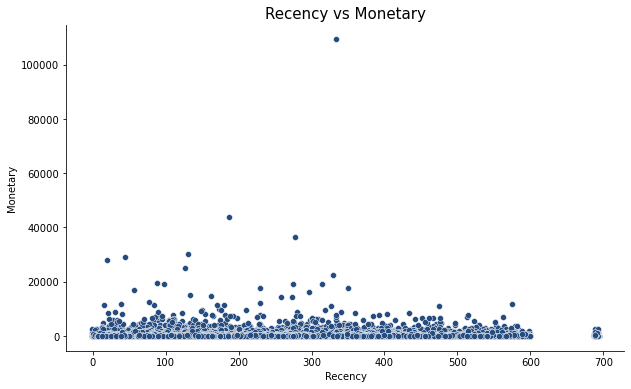

In [93]:
plt.figure(figsize= [10, 6])
sns.scatterplot(x= 'Recency',y= 'Monetary', data=rfm_table)
plt.title('Recency vs Monetary', fontsize= 15)
sns.despine()

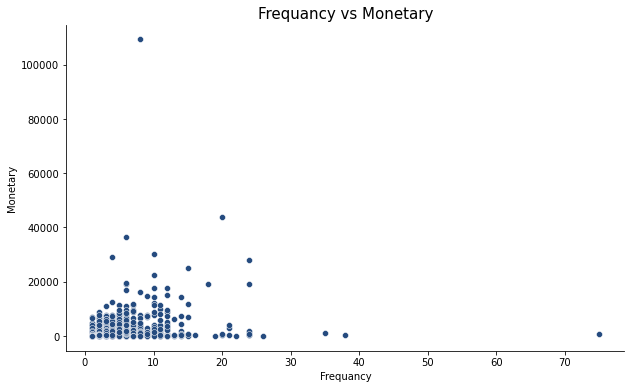

In [94]:
plt.figure(figsize= [10, 6])
sns.scatterplot(x='Frequancy', y='Monetary', data=rfm_table)
plt.title('Frequancy vs Monetary', fontsize= 15)
sns.despine()

#### Calculate RFM Score

In [95]:
rfm_table['rfm_score'] = 100 * rfm_table['r_score'].astype(int) + 10 * rfm_table['f_score'].astype(int)+ rfm_table['m_score'].astype(int)
rfm_table

,Recency,Frequancy,Monetary,r_score,f_score,m_score,rfm_score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,110,1,141.90,4,1,3,413
0000b849f77a49e4a4ce2b2a4ca5be3f,113,1,27.19,3,1,1,311
0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,3,213
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84,1,4,4,144
fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,2,4,2,242
ffff371b4d645b6ecea244b27531430a,567,1,112.46,1,4,2,142


#### Cluster customers based on RFM Score

In [96]:
def customer_segmenation(rfm_score):
  
  if rfm_score == 444:
    return 'VIP'
  
  elif  rfm_score >= 433 and rfm_score < 444:
    return 'Very Loyal'
  
  elif   rfm_score >=421 and rfm_score< 433:
    return 'Potential Loyalist'
  
  elif rfm_score>=344 and rfm_score < 421:
    return 'New customers'
  
  elif rfm_score>=323 and rfm_score<344:
    return 'Potential customer'
  
  elif rfm_score>=224 and rfm_score<311:
    return 'High risk to churn' 
  
  else:
    return 'Lost customers'       
  
rfm_table['customer_segmentation'] = rfm_table['rfm_score'].apply(customer_segmenation)

rfm_table

,Recency,Frequancy,Monetary,r_score,f_score,m_score,rfm_score,customer_segmentation
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,110,1,141.90,4,1,3,413,New customers
0000b849f77a49e4a4ce2b2a4ca5be3f,113,1,27.19,3,1,1,311,Lost customers
0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,2,112,Lost customers
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1,211,Lost customers
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,3,213,Lost customers
...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84,1,4,4,144,Lost customers
fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,2,4,2,242,High risk to churn
ffff371b4d645b6ecea244b27531430a,567,1,112.46,1,4,2,142,Lost customers


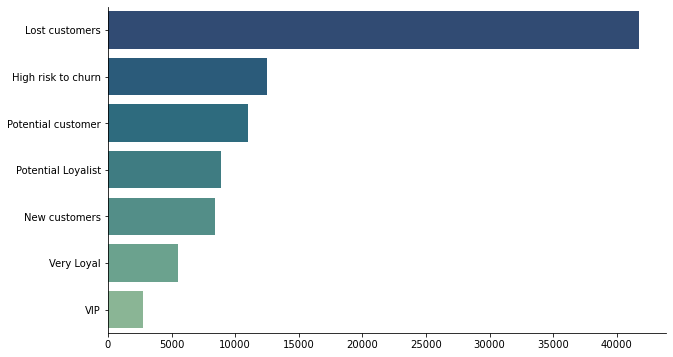

In [97]:
plt.figure(figsize=[10,6])
sns.barplot(x = rfm_table.customer_segmentation.value_counts().values, y= rfm_table.customer_segmentation.value_counts().index, palette= 'crest_r')
sns.despine()

### Check Outliers

In [98]:
rfm_table.describe()

,Recency,Frequancy,Monetary,rfm_score
count,90967.000000,90967.000000,90967.000000,90967.000000
mean,235.148197,1.237042,211.874402,277.935768
std,152.224787,0.843657,632.222983,112.463024
min,-1.000000,1.000000,9.590000,111.000000
25%,112.000000,1.000000,63.680000,211.000000
50%,216.000000,1.000000,112.680000,311.000000
75%,344.000000,1.000000,201.990000,411.000000
max,694.000000,75.000000,109312.640000,444.000000


#### Recency

<AxesSubplot:xlabel='Recency'>

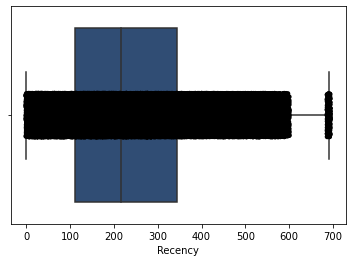

In [99]:
sns.boxplot(x= rfm_table.Recency)
sns.stripplot(x = rfm_table.Recency, color= 'black')

#### Frequancy

<AxesSubplot:xlabel='Frequancy'>

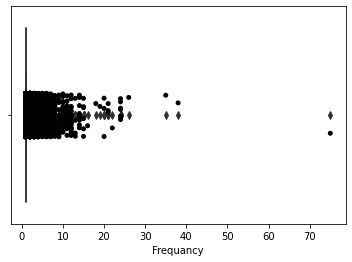

In [100]:
sns.boxplot(x= rfm_table.Frequancy)
sns.stripplot(x = rfm_table.Frequancy, color= 'black')

#### Monetary

<AxesSubplot:xlabel='Monetary'>

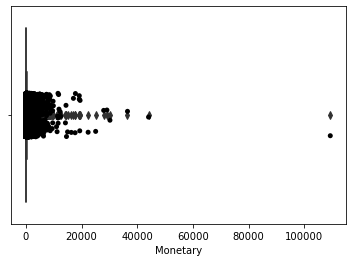

In [101]:
sns.boxplot(x= rfm_table.Monetary)
sns.stripplot(x = rfm_table.Monetary, color= 'black')

#### Remove Extreme 5% of Outliers

In [102]:
print('Recency 5% Outliers Limits:', np.percentile(rfm_table.Recency, 5), np.percentile(rfm_table.Recency, 95))
print('Frequancy 5% Outliers Limits:', np.percentile(rfm_table.Frequancy, 5), np.percentile(rfm_table.Frequancy, 95))
print('Monetary 5% Outliers Limits:', np.percentile(rfm_table.Monetary, 5), np.percentile(rfm_table.Monetary, 95))

Recency 5% Outliers Limits: 22.0 517.0
Frequancy 5% Outliers Limits: 1.0 2.0
Monetary 5% Outliers Limits: 32.69 660.3969999999999


#### Remove Outliers for Recency & Monetary (Extreme 5%)

In [103]:
for i in [0, 2]:

    outlier_indices = []
    col = rfm_table.columns[i]
    percentile_5 = np.percentile(rfm_table[col], 5)
    percentile_95 = np.percentile(rfm_table[col], 95)
    outlier_indices.append(rfm_table[(rfm_table[col] < percentile_5) | (rfm_table[col] > percentile_95)].index)

rfm_table.drop(outlier_indices[0][:], inplace= True)
rfm_table.reset_index(inplace= True, drop= True)

In [ ]:
! pip install squarify


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Customer Segmentation Grid

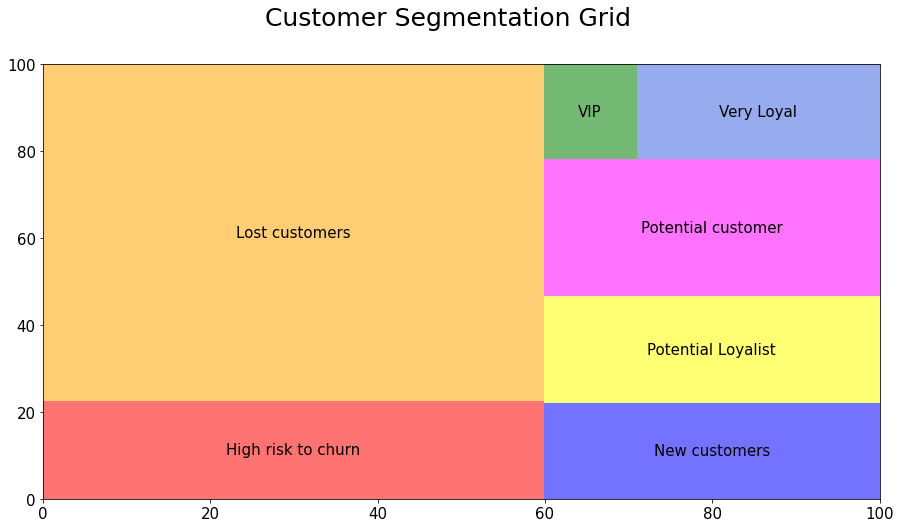

In [105]:
import squarify

plt.figure(figsize=[15,8])
plt.rc('font', size=15)

Sizes = rfm_table.groupby('customer_segmentation')[['Monetary']].count()
squarify.plot(sizes= Sizes.values, label= Sizes.index, color=["red", "orange", "blue", "yellow", "fuchsia", "green", "royalblue"], alpha=.55)
plt.suptitle("Customer Segmentation Grid", fontsize=25);

#### Recency & Monetary Plot

c:\Users\lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


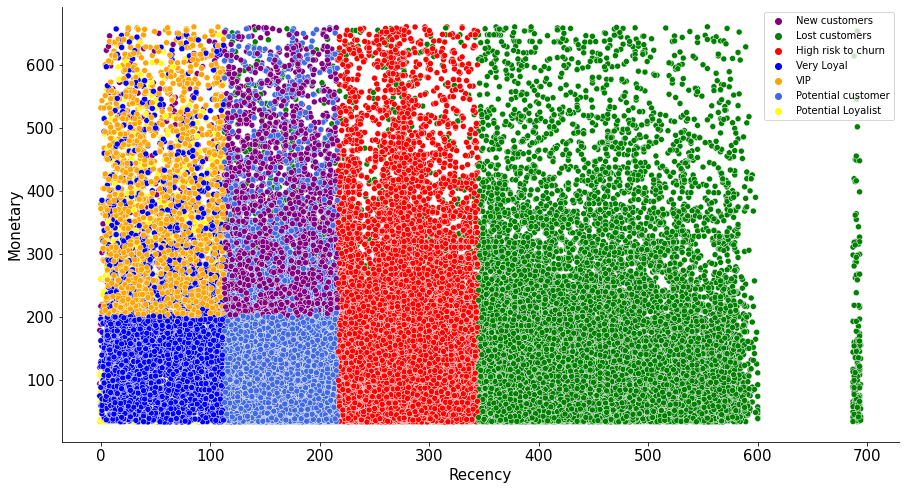

In [106]:
plt.figure(figsize= [15, 8])
colors = ['purple', 'green', 'red', 'blue', 'orange', 'royalblue', 'yellow']
sns.scatterplot(x= rfm_table.Recency, y= rfm_table.Monetary, hue= rfm_table.customer_segmentation, palette= colors)
plt.legend(prop={'size':10})
sns.despine()

### Check Skeweness

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

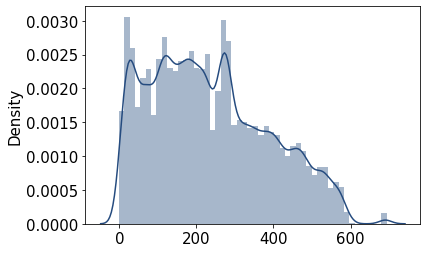

In [107]:
# Recency
sns.distplot(x= rfm_table.Recency)

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

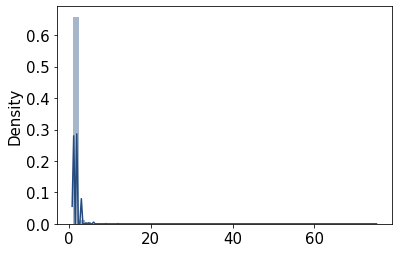

In [108]:
# Frequancy
sns.distplot(x= rfm_table.Frequancy)

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

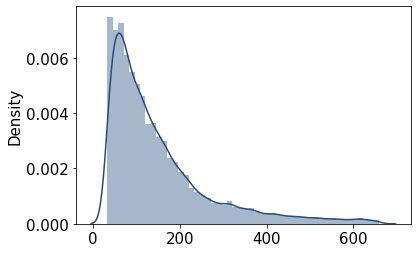

In [109]:
# Monetary
sns.distplot(x= rfm_table.Monetary)

#### Apply Log function to handle skeweness for Frequancy & Monetary

In [110]:
for i in ['Frequancy', 'Monetary']:
    rfm_table[i] = np.log10(rfm_table[i])

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

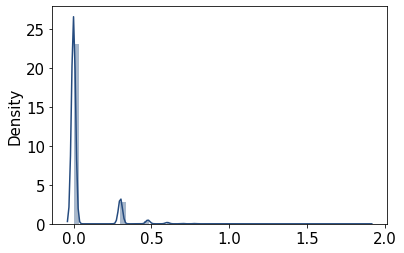

In [111]:
# Frequancy
sns.distplot(x= rfm_table.Frequancy)

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

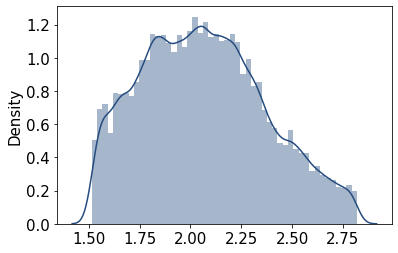

In [112]:
# Monetary
sns.distplot(x= rfm_table.Monetary)

### 9.2 Clustering with K-means

In [68]:
df_cluster = df_2[['freight_value', 'price', 'payment_value', 'payment_installments', 'payment_sequential']]
df_cluster

,freight_value,price,payment_value,payment_installments,payment_sequential
0,21.88,124.99,146.87,2,1
1,24.90,112.99,275.79,1,1
2,24.90,112.99,275.79,1,1
3,15.62,124.99,140.61,7,1
4,30.59,106.99,137.58,10,1
...,...,...,...,...,...
112525,39.19,193.00,232.19,10,1
112526,37.70,389.00,426.70,8,1
112527,21.46,139.00,160.46,3,1
112528,26.18,129.00,55.18,2,1


### Take sample from data (10k)

In [69]:
df_sample = df_cluster.sample(frac= 1, random_state= 42)[:10000]

#### Save sample as CSV for deployment

In [115]:
df_sample.to_csv('Clustering Sample.csv')

In [70]:
df_sample.describe()

,freight_value,price,payment_value,payment_installments,payment_sequential
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.914930,119.287136,169.829120,2.931900,1.090100
std,16.079686,181.080900,240.579562,2.771828,0.699021
min,0.000000,0.850000,0.030000,1.000000,1.000000
25%,13.070000,39.990000,61.850000,1.000000,1.000000
50%,16.320000,75.000000,108.000000,2.000000,1.000000
75%,21.190000,130.125000,188.940000,4.000000,1.000000
max,338.300000,3999.900000,7274.880000,24.000000,24.000000


#### Drop freight values with zeros

In [71]:
df_sample.drop(df_sample[df_sample.freight_value == 0].index, inplace= True)
df_sample.reset_index(inplace= True, drop= True)

#### Take copy for Pipeline

In [72]:
cluster_pipeline = df_sample.copy()

In [73]:
for i in ['freight_value', 'price', 'payment_value', 'payment_installments', 'payment_sequential']:
    df_sample[i] = np.log10(df_sample[i])

### Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean= False)
data_scaled = sc.fit_transform(df_sample)

#### Detecting number of clusters uning Elbow Method

Text(0, 0.5, 'WCSS')

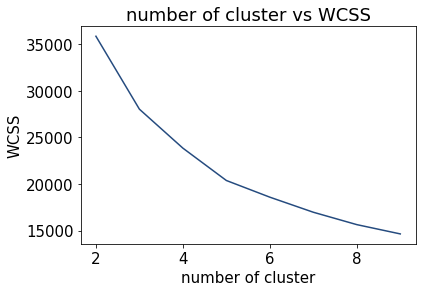

In [121]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []
scores = []

for i in range(2,10):
  kmean = KMeans(n_clusters=i)
  y_pred_kmean = kmean.fit_predict(data_scaled)
  wcss.append(kmean.inertia_)
  scores.append(silhouette_score(data_scaled,y_pred_kmean))

plt.plot(range(2,10),wcss)
plt.title('number of cluster vs WCSS')
plt.xlabel('number of cluster')
plt.ylabel('WCSS')

#### Detecting number of clusters using Silhouete Score

Text(0, 0.5, 'silhouette_score')

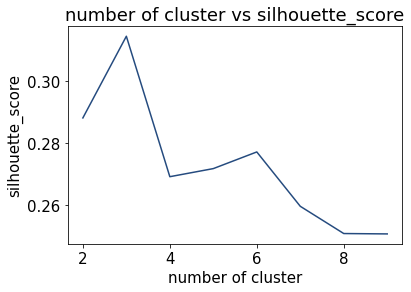

In [122]:
plt.plot(range(2,10),scores)
plt.title('number of cluster vs silhouette_score')
plt.xlabel('number of cluster')
plt.ylabel('silhouette_score')

#### Select number of clusters k= 3

In [75]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters= 3)
y_pred_kmean = kmean.fit_predict(data_scaled)

In [76]:
# Count of each cluster
len(kmean.labels_[kmean.labels_ == 0]), len(kmean.labels_[kmean.labels_ == 1]), len(kmean.labels_[kmean.labels_ == 2])

(4146, 5397, 423)

In [88]:
# Take another sample of original cluster dataframe to assign kmeans labels
original_cluster_sample = df_cluster.sample(frac= 1, random_state= 42)[:9966]

# Assign cluster label to original cluster sample
original_cluster_sample['cluster_label'] = y_pred_kmean
original_cluster_sample.head()

,freight_value,price,payment_value,payment_installments,payment_sequential,cluster_label
20549,18.23,45.0,63.23,1,1,1
96866,7.87,32.5,40.37,1,1,1
51608,12.87,195.9,417.54,1,1,0
20676,22.41,76.0,479.22,2,1,0
98133,15.10,25.9,41.00,1,1,1


In [90]:
original_cluster_sample.groupby('cluster_label').describe().T

cluster_label                         0            1            2
freight_value        count  4146.000000  5397.000000   423.000000
                     mean     20.086616    19.718112    20.604184
                     std      16.523869    15.281219    21.042242
                     min       0.000000     0.000000     0.000000
                     25%      13.080000    12.990000    13.370000
                     50%      16.260000    16.320000    16.740000
                     75%      21.350000    21.150000    20.800000
                     max     338.300000   299.160000   255.920000
price                count  4146.000000  5397.000000   423.000000
                     mean    120.847767   118.224486   110.347754
                     std     170.746710   189.064090   156.385282
                     min       0.850000     3.900000     5.500000
                     25%      41.900000    39.950000    35.950000
                     50%      75.900000    74.900000    69.900000
                     75%     134.997500   129.990000   123.945000
                     max    2999.890000  3999.900000  1609.900000
payment_value        count  4146.000000  5397.000000   423.000000
                     mean    171.656594   167.219885   162.319693
                     std     225.117269   233.559651   223.897993
                     min       0.080000     0.030000     0.810000
                     25%      62.727500    60.860000    61.120000
                     50%     109.800000   106.960000    99.010000
                     75%     192.985000   184.750000   176.050000
                     max    3024.080000  4016.910000  1916.960000
payment_installments count  4146.000000  5397.000000   423.000000
                     mean      2.962615     2.887901     3.099291
                     std       2.755725     2.774486     2.793794
                     min       1.000000     1.000000     1.000000
                     25%       1.000000     1.000000     1.000000
                     50%       2.000000     1.000000     2.000000
                     75%       4.000000     4.000000     4.000000
                     max      24.000000    24.000000    10.000000
payment_sequential   count  4146.000000  5397.000000   423.000000
                     mean      1.078871     1.102835     1.044917
                     std       0.600605     0.789329     0.248915
                     min       1.000000     1.000000     1.000000
                     25%       1.000000     1.000000     1.000000
                     50%       1.000000     1.000000     1.000000
                     75%       1.000000     1.000000     1.000000
                     max      17.000000    24.000000     4.000000

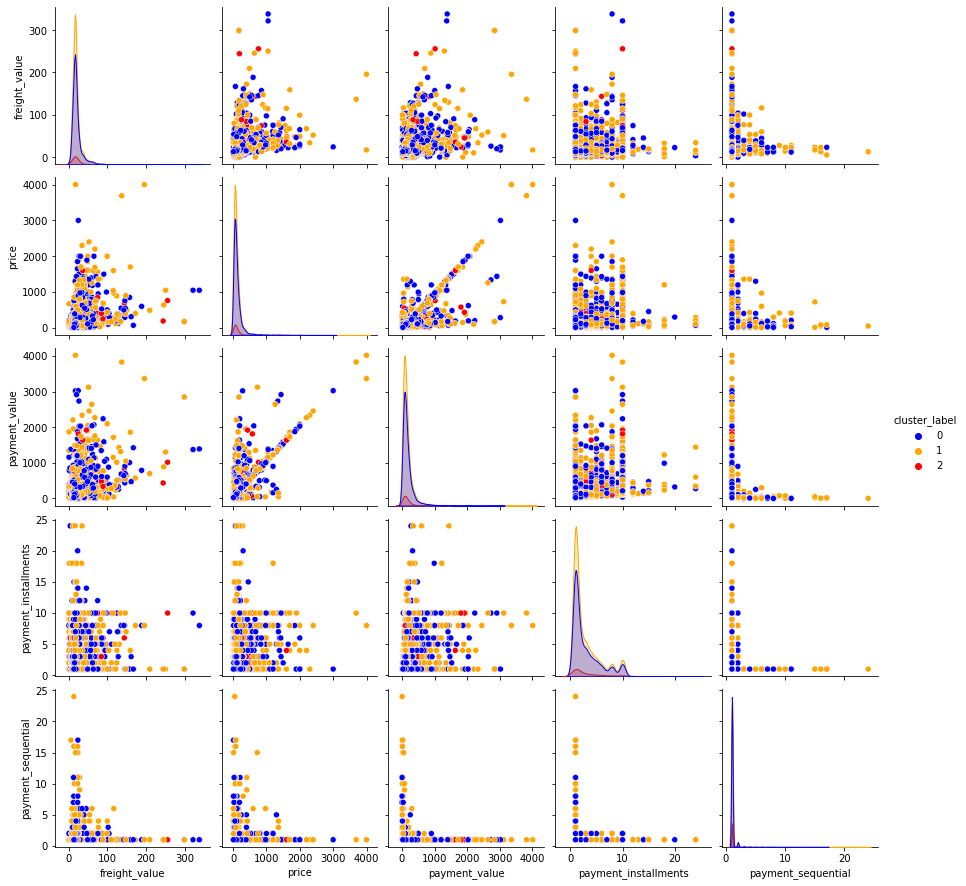

In [89]:
sns.pairplot(data= original_cluster_sample, hue= 'cluster_label', palette= ['blue', 'orange', 'red'])

#### As we can see from statistics table and pairplot that clusters have high percentage of overlaping, sow RFM would be better in this case to cluster customers.

#### Show Kmeans Clusters

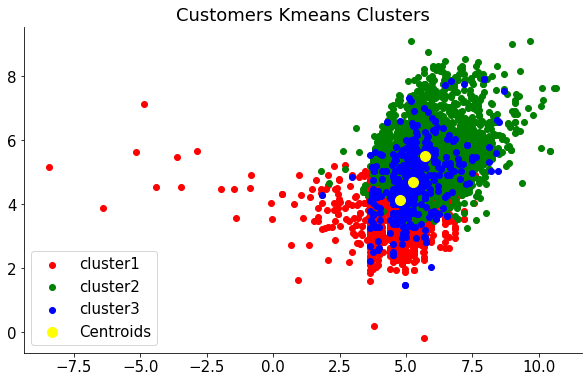

In [129]:
plt.figure(figsize=[10, 6])
plt.scatter(data_scaled[y_pred_kmean==0,0], data_scaled[y_pred_kmean==0,1], c = 'red',label = 'cluster1')
plt.scatter(data_scaled[y_pred_kmean==1,0], data_scaled[y_pred_kmean==1,1], c = 'green',label = 'cluster2')
plt.scatter(data_scaled[y_pred_kmean==2,0], data_scaled[y_pred_kmean==2,1], c = 'blue',label = 'cluster3')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], c='yellow', s= 100,label= 'Centroids')
plt.title('Customers Kmeans Clusters')
plt.legend()
sns.despine()

#### Show Cluster using PCA

In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
x_pca = pca.fit_transform(data_scaled)
pca.explained_variance_ratio_

array([0.45422138, 0.21956351])

Text(0, 0.5, 'WCSS')

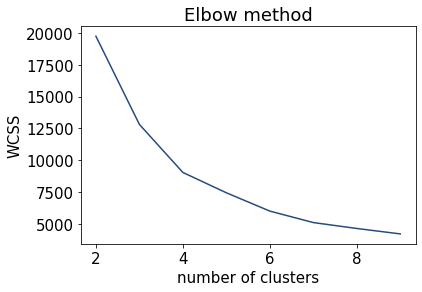

In [131]:
wcss = []
scores = []
for i in range(2,10):
  kmean = KMeans(n_clusters=i)
  y_pred = kmean.fit_predict(x_pca)
  wcss.append(kmean.inertia_)
  scores.append(silhouette_score(x_pca,y_pred))
plt.plot(range(2,10),wcss)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')  

Text(0, 0.5, 'silhouette_score')

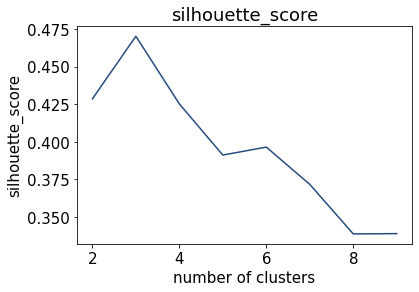

In [132]:
plt.plot(range(2,10),scores)
plt.title('silhouette_score')
plt.xlabel('number of clusters')
plt.ylabel('silhouette_score')

In [133]:
kmean = KMeans(n_clusters=3)
y_pred_pca = kmean.fit_predict(x_pca)

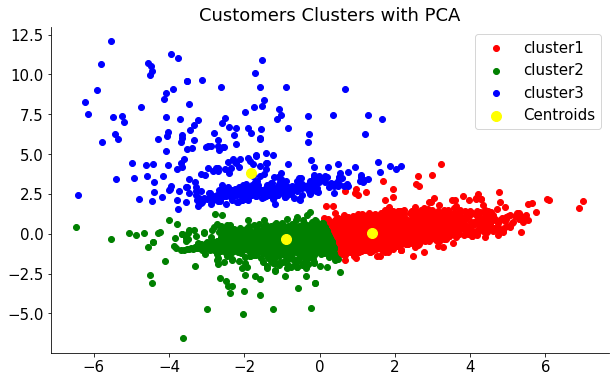

In [134]:
plt.figure(figsize=[10, 6])
plt.scatter(x_pca[y_pred_pca==0,0],x_pca[y_pred_pca==0,1],c = 'red',label = 'cluster1')
plt.scatter(x_pca[y_pred_pca==1,0],x_pca[y_pred_pca==1,1],c = 'green',label = 'cluster2')
plt.scatter(x_pca[y_pred_pca==2,0],x_pca[y_pred_pca==2,1],c = 'blue',label = 'cluster3')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],c='yellow',s=100,label='Centroids')
plt.title('Customers Clusters with PCA')
plt.legend()
sns.despine()

## 9.3 Pipeline

#### Prepare Features

In [135]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

numerical_pipeline_cluster = Pipeline(steps=[('Feature Scaling', StandardScaler(with_mean=False))])

In [136]:
from sklearn.compose import ColumnTransformer

preprocessing_cluster = ColumnTransformer(transformers= [('Numerical Columns', numerical_pipeline_cluster, cluster_pipeline.columns)], 
                                          remainder= 'passthrough')
preprocessing_cluster

ColumnTransformer(remainder='passthrough',
                  transformers=[('Numerical Columns',
                                 Pipeline(steps=[('Feature Scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['freight_value', 'price', 'payment_value', 'payment_installments',
       'payment_sequential'],
      dtype='object'))])

In [137]:
final_pipeline_cluster = Pipeline(steps=[('Preprocessing', preprocessing_cluster), ('Log Transformer', FunctionTransformer(np.log10)),
                                ('Model', KMeans(n_clusters= 3))])
final_pipeline_cluster

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'price', 'payment_value', 'payment_installments',
       'payment_sequential'],
      dtype='object'))])),
                ('Log Transformer', FunctionTransformer(func=<ufunc 'log10'>)),
                ('Model', KMeans(n_clusters=3))])

In [138]:
# Fit pipeline to Dataframe
final_pipeline_cluster.fit(cluster_pipeline)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'price', 'payment_value', 'payment_installments',
       'payment_sequential'],
      dtype='object'))])),
                ('Log Transformer', FunctionTransformer(func=<ufunc 'log10'>)),
                ('Model', KMeans(n_clusters=3))])

In [139]:
# Save model as bkl file
import joblib
joblib.dump(final_pipeline_cluster, 'Brazilian Ecommerce Clustering.bkl')

['Brazilian Ecommerce Clustering.bkl']

In [140]:
final_pipeline_cluster

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'price', 'payment_value', 'payment_installments',
       'payment_sequential'],
      dtype='object'))])),
                ('Log Transformer', FunctionTransformer(func=<ufunc 'log10'>)),
                ('Model', KMeans(n_clusters=3))])

# 10.0 Model Deployment

In [141]:
model_classification = joblib.load('Brazilian Ecommerce Classification.bkl')
model_clustering = joblib.load('Brazilian Ecommerce Clustering.bkl')

#### Test Classification Model

In [142]:
model_classification.predict(pd.DataFrame({'freight_value' :[30], 'product_description_lenght' :[1000], 'product_photos_qty' :[4], 'payment_type' :['credit_card'], 'payment_installments' :[6], 'payment_value' :[1000], 'estimated_days' :[7], 'arrival_days' :[6], 'arrival_status' :['OnTime/Early'], 'seller_to_carrier_status' :['OnTime/Early'], 'estimated_delivery_rate' :['Very Fast'], 'arrival_delivery_rate' :['Very Fast'], 'shipping_delivery_rate' :['Very Fast']}))

array([1])

#### Test Clustering Model

In [144]:
model_clustering.predict(pd.DataFrame({'freight_value' :[10], 'price' :[90], 'payment_value' :[100], 'payment_installments' :[10], 'payment_sequential' :[3]}))

array([0])

In [ ]:
# Install neccessary libraries for deployment

#! pip install ydata_profiling
#! pip install streamlit_pandas_profiling

### Deployment with Streamlit

In [5]:
%%writefile Brazilian_Ecommerce_Project.py

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import streamlit as st
from sklearn.preprocessing import  StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from ydata_profiling import ProfileReport
from streamlit_pandas_profiling import st_profile_report

# Load Classification and Clustering Pipeline models
model_classification = joblib.load('Brazilian Ecommerce Classification.bkl')
model_clustering = joblib.load('Brazilian Ecommerce Clustering.bkl')

# Create Sidebar to navigate between EDA, Classification and Clustering
sidebar = st.sidebar
mode = sidebar.radio('Mode', ['EDA', 'Classification', 'Clustering'])
st.markdown("<h1 style='text-align: center; color: #ff0000;'></h1>", unsafe_allow_html=True)

if mode == "EDA":

    st.image('EDA.jpg')

    def main():
        # Create sidebar to upload CSV files
        with st.sidebar.header('Upload your CSV data'):
            uploaded_file = st.sidebar.file_uploader('Upload your input csv file')

        if uploaded_file is not None:
            # Read file and Put headers
            EDA_sample = pd.read_csv(uploaded_file, index_col= 0)
            pr = ProfileReport(EDA_sample, explorative=True)
            st.header('**Input DataFrame**')
            st.write(EDA_sample)
            st.write('---')
            st.header('**Pandas Profiling Report**')
            st_profile_report(pr)
        
        else:
            st.info('Awaiting for CSV file to be uploaded.')

    if __name__ == '__main__':
        main()

if mode == "Classification":

    st.image('satisfaction.jpg')
    # Define function to predict classification based on assigned features
    def predict_satisfaction(freight_value, product_description_lenght, product_photos_qty, payment_type, payment_installments, payment_value, 
    estimated_days, arrival_days, arrival_status, seller_to_carrier_status, estimated_delivery_rate, arrival_delivery_rate, shipping_delivery_rate):

        prediction_classification = model_classification.predict(pd.DataFrame({'freight_value' :[freight_value], 'product_description_lenght' :[product_description_lenght], 'product_photos_qty' :[product_photos_qty], 'payment_type' :[payment_type], 'payment_installments' :[payment_installments], 'payment_value' :[payment_value], 'estimated_days' :[estimated_days], 'arrival_days' :[arrival_days], 'arrival_status' :[arrival_status], 'seller_to_carrier_status' :[seller_to_carrier_status], 'estimated_delivery_rate' :[estimated_delivery_rate], 'arrival_delivery_rate' :[arrival_delivery_rate], 'shipping_delivery_rate' :[shipping_delivery_rate]}))
        return prediction_classification

    def main():

        # Header of Customer Satisfaction Prediction
        html_temp="""
                    <div style="background-color:#F5F5F5">
                    <h1 style="color:#31333F;text-align:center;"> Customer Satisfaction Prediction </h1>
                    </div>
                """
        st.markdown(html_temp,unsafe_allow_html=True)
        
        # Assign all features with desired data input method
        sidebar.title('Numerical Features')
        product_description_lenght = sidebar.slider('product_description_lenght', 4,3990,100)
        product_photos_qty = sidebar.slider('product_photos_qty', 1,20,1)
        payment_installments = sidebar.slider('payment_installments', 1,24,1)
        estimated_days = sidebar.slider('estimated_days', 3,60,1)
        arrival_days = sidebar.slider('arrival_days', 0,60,1)
        payment_type = st.selectbox('payment_type', ['credit_card', 'boleto', 'voucher', 'debit_card'])
        arrival_status = st.selectbox('arrival_status', ['OnTime/Early', 'Late'])
        seller_to_carrier_status = st.selectbox('seller_to_carrier_status', ['OnTime/Early', 'Late'])
        estimated_delivery_rate = st.selectbox('estimated_delivery_rate', ['Very Slow', 'Slow', 'Neutral', 'Fast', 'Very Fast'])
        arrival_delivery_rate = st.selectbox('arrival_delivery_rate', ['Very Slow', 'Slow', 'Neutral', 'Fast', 'Very Fast'])
        shipping_delivery_rate = st.selectbox('shipping_delivery_rate Date', ['Very Slow', 'Slow', 'Neutral', 'Fast', 'Very Fast'])
        payment_value = st.text_input('payment_value', '')
        freight_value = st.text_input('freight_value', '')
        result = ''

        # Predict Customer Satsifaction
        if st.button('Predict_Satisfaction'):
            result = predict_satisfaction(freight_value, product_description_lenght, product_photos_qty, payment_type, payment_installments, payment_value, 
                                        estimated_days, arrival_days, arrival_status, seller_to_carrier_status, estimated_delivery_rate, arrival_delivery_rate, shipping_delivery_rate)
                                        
        if result == 0:
            result = 'Not Satisfied'
            st.success(f'The Customer is {result}')
        else:
            result = 'Satisfied'
            st.success(f'The Customer is {result}')

    if __name__ == '__main__':
        main()

if mode == "Clustering":
    
    st.image('segmentation.jpg')

    def predict_clustering(freight_value, price, payment_value, payment_installments, payment_sequential):

        prediction_clustering = model_clustering.predict(pd.DataFrame({'freight_value' :[freight_value], 'price' :[price], 'payment_installments' :[payment_installments], 'payment_value' :[payment_value], 'payment_sequential' :[payment_sequential]}))
        return prediction_clustering

    def main():

        # Header of Customer Segmentation
        html_temp="""
                <div style="background-color:#F5F5F5">
                <h1 style="color:#31333F;text-align:center;"> Customer Segmentation </h1>
                </div>
            """
        st.markdown(html_temp,unsafe_allow_html=True)

        # Assign all features with desired data input method
        payment_installments = st.slider('payment_installments', 1,24,1)
        payment_sequential = st.slider('payment_sequential', 1,24,1)
        freight_value = st.text_input('freight_value', '')
        price = st.text_input('price', '')
        payment_value = st.text_input('payment_value', '')
        result_cluster = ''

        # Predict Cluster of the customer
        if st.button('Predict_Cluster'):
            result_cluster = predict_clustering(freight_value, price, payment_value, payment_installments, payment_sequential)
                                        
        st.success(f'Customer Cluster is {result_cluster}')
        
        # Upload CSV file
        with st.sidebar.header('Upload your CSV data'):
            uploaded_file = st.sidebar.file_uploader('Upload your input csv file')

        if uploaded_file is not None:

            # Read dataset
            sample = pd.read_csv(uploaded_file, index_col= 0)
            
            # Define sidebar for clustering algorithm
            selected_algorithm = sidebar.selectbox('Select Clustering Algorithm', ['K-Means', 'Agglomerative'])

            # Define sidebar for number of clusters
            selected_clusters = sidebar.slider('Select number of clusters', 2, 10, 1)

            # Define sidebar for PCA
            use_pca = sidebar.radio('Use PCA', ['No', 'Yes'])

            # Drop freight values with zeros
            sample.drop(sample[sample.freight_value == 0].index, inplace= True)
            # Reset Index 
            sample.reset_index(inplace= True, drop= True)
            # Handle Skeweness in sample data
            for i in ['freight_value', 'price', 'payment_value', 'payment_installments', 'payment_sequential']:
                sample[i] = np.log10(sample[i])

            # Apply standard scaler
            sc = StandardScaler(with_mean= False)
            data_scaled = sc.fit_transform(sample)

            # Select number of clusters
            if selected_algorithm == 'Agglomerative':
                hc = AgglomerativeClustering(n_clusters= selected_clusters)
                y_pred_hc = hc.fit_predict(data_scaled)

            else:
                kmean = KMeans(n_clusters= selected_clusters)
                y_pred_kmean = kmean.fit_predict(data_scaled)

            # Apply PCA
            pca = PCA(n_components= 2)
            data_pca = pca.fit_transform(data_scaled)

            # Select number of clusters for PCA
            kmean_pca = KMeans(n_clusters= selected_clusters)
            y_pred_pca = kmean_pca.fit_predict(data_pca)

            def plot_cluster(data, y_pred, num_clusters):

                # Plot Clusters
                fig, ax = plt.subplots()
                Colors= ['red', 'green', 'blue', 'purple', 'orange', 'royalblue', 'brown', 'grey', 'chocolate', 'fuchsia']
                for i in range(num_clusters):
                    ax.scatter(data[y_pred==i,0], data[y_pred==i,1], c= Colors[i], label= 'Cluster ' + str(i+1))

                ax.set_title('Customers Clusters')
                ax.legend(loc='upper left', prop={'size':5})
                ax.axis('off')
                st.pyplot(fig)

            # Option to select and plot PCA for clustering
            if use_pca == 'No' and selected_algorithm == 'K-Means':
                plot_cluster(data_scaled, y_pred_kmean, selected_clusters)

            elif use_pca == 'No' and selected_algorithm == 'Agglomerative':
                plot_cluster(data_scaled, y_pred_hc, selected_clusters)           

            else:
                plot_cluster(data_pca, y_pred_pca, selected_clusters)    
        
        else:
            st.info('Awaiting for CSV file to be uploaded.')

    if __name__ == '__main__':
        main()

Overwriting Brazilian_Ecommerce_Project.py


In [6]:
! streamlit run Brazilian_Ecommerce_Project.py

^C


# 11.0 Wrap up & Conclusion

###### 1- Feature Engineering for some datetime features which are very important in the analysis.
###### 2- EDA to gain some useful insights like how accurate are estimated delivery dates provided by the website (93.8% Early/OnTime, 4.2% Late).
###### 3- Feature Selection to check best features, where we found that shipping features were important.
###### 4- Apply different ML models to predict customer satisfaction either Satisfied or Non-Satisfied, however the results didn't show good performance on testing specially for minor class Non-Satisfied (67% on testing for Macro avg F1-score).
###### 5- To investigate further why results are not good on testing, we used NLP on customers reviews with Naive bayes model to predict satisfaction but this time based on reviews written by customers.
###### 6- The NLP model have shown much better results than previous models (87% on testing).
###### 7- To understand why results are low on traditional models and high with NLP, we investigated further the Non Satisfied customers reviews and found that more than 90% of words in reviews are related to shipping issues.
###### 8- The conflict we have now is that accuracy of estimated delivery dates by the website only mentions 6.2% of lateness, however non-satisfied customers reviews (which represents 23% of data) tell us that shipping lateness is the main reason for non-satisfaction.
###### 9- From this conflict we conclude that the accuracy of estimated delivery dates by the website is misleading because it's only from website perspective or carrier perspective not the customer, for ex maybe the customer didn't receive the order but on the system it shows that it was delivered, or maybe it was delivered late but on the system doesn't show it was delivered late and that's because the customer has no contribution to the system except for written reviews.
###### 10- As a conclusion if we need to predict customer satisfactio based on transaction features we should handle the previous issue first, or the model will always provide bad results to predict satisfaction because of the overlaping between satisfied and non-satisfied which is caused due to the issue mentioned.
###### 11- After that we make customer segmentation using RFM analysis and K-Means, however RFM analysis provides better segmentation as K-Means has high level of overlaping between segments.
###### 12- Finally we deploy Streamlit web App for EDA, Classification and Clustering providing the option to upload sample data and investigate it by the App.